In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Thesis/Final

/content/drive/MyDrive/Thesis/Final


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Fri Jun  2 12:28:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Thesis/Final


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.0

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


In [ ]:
# Git clone method (for development)

%cd {HOME}
!git clone https://github.com/ultralytics/ultralytics.git
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/MyDrive/Thesis/Final/dataset/data.yaml' epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/Thesis/Final
WARNING ⚠️ Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
100% 21.5M/21.5M [00:00<00:00, 179MB/s]
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Thesis/Final/dataset/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, 

In [ ]:
!ls /content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1685708980.a0d91c021e5e.1315.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


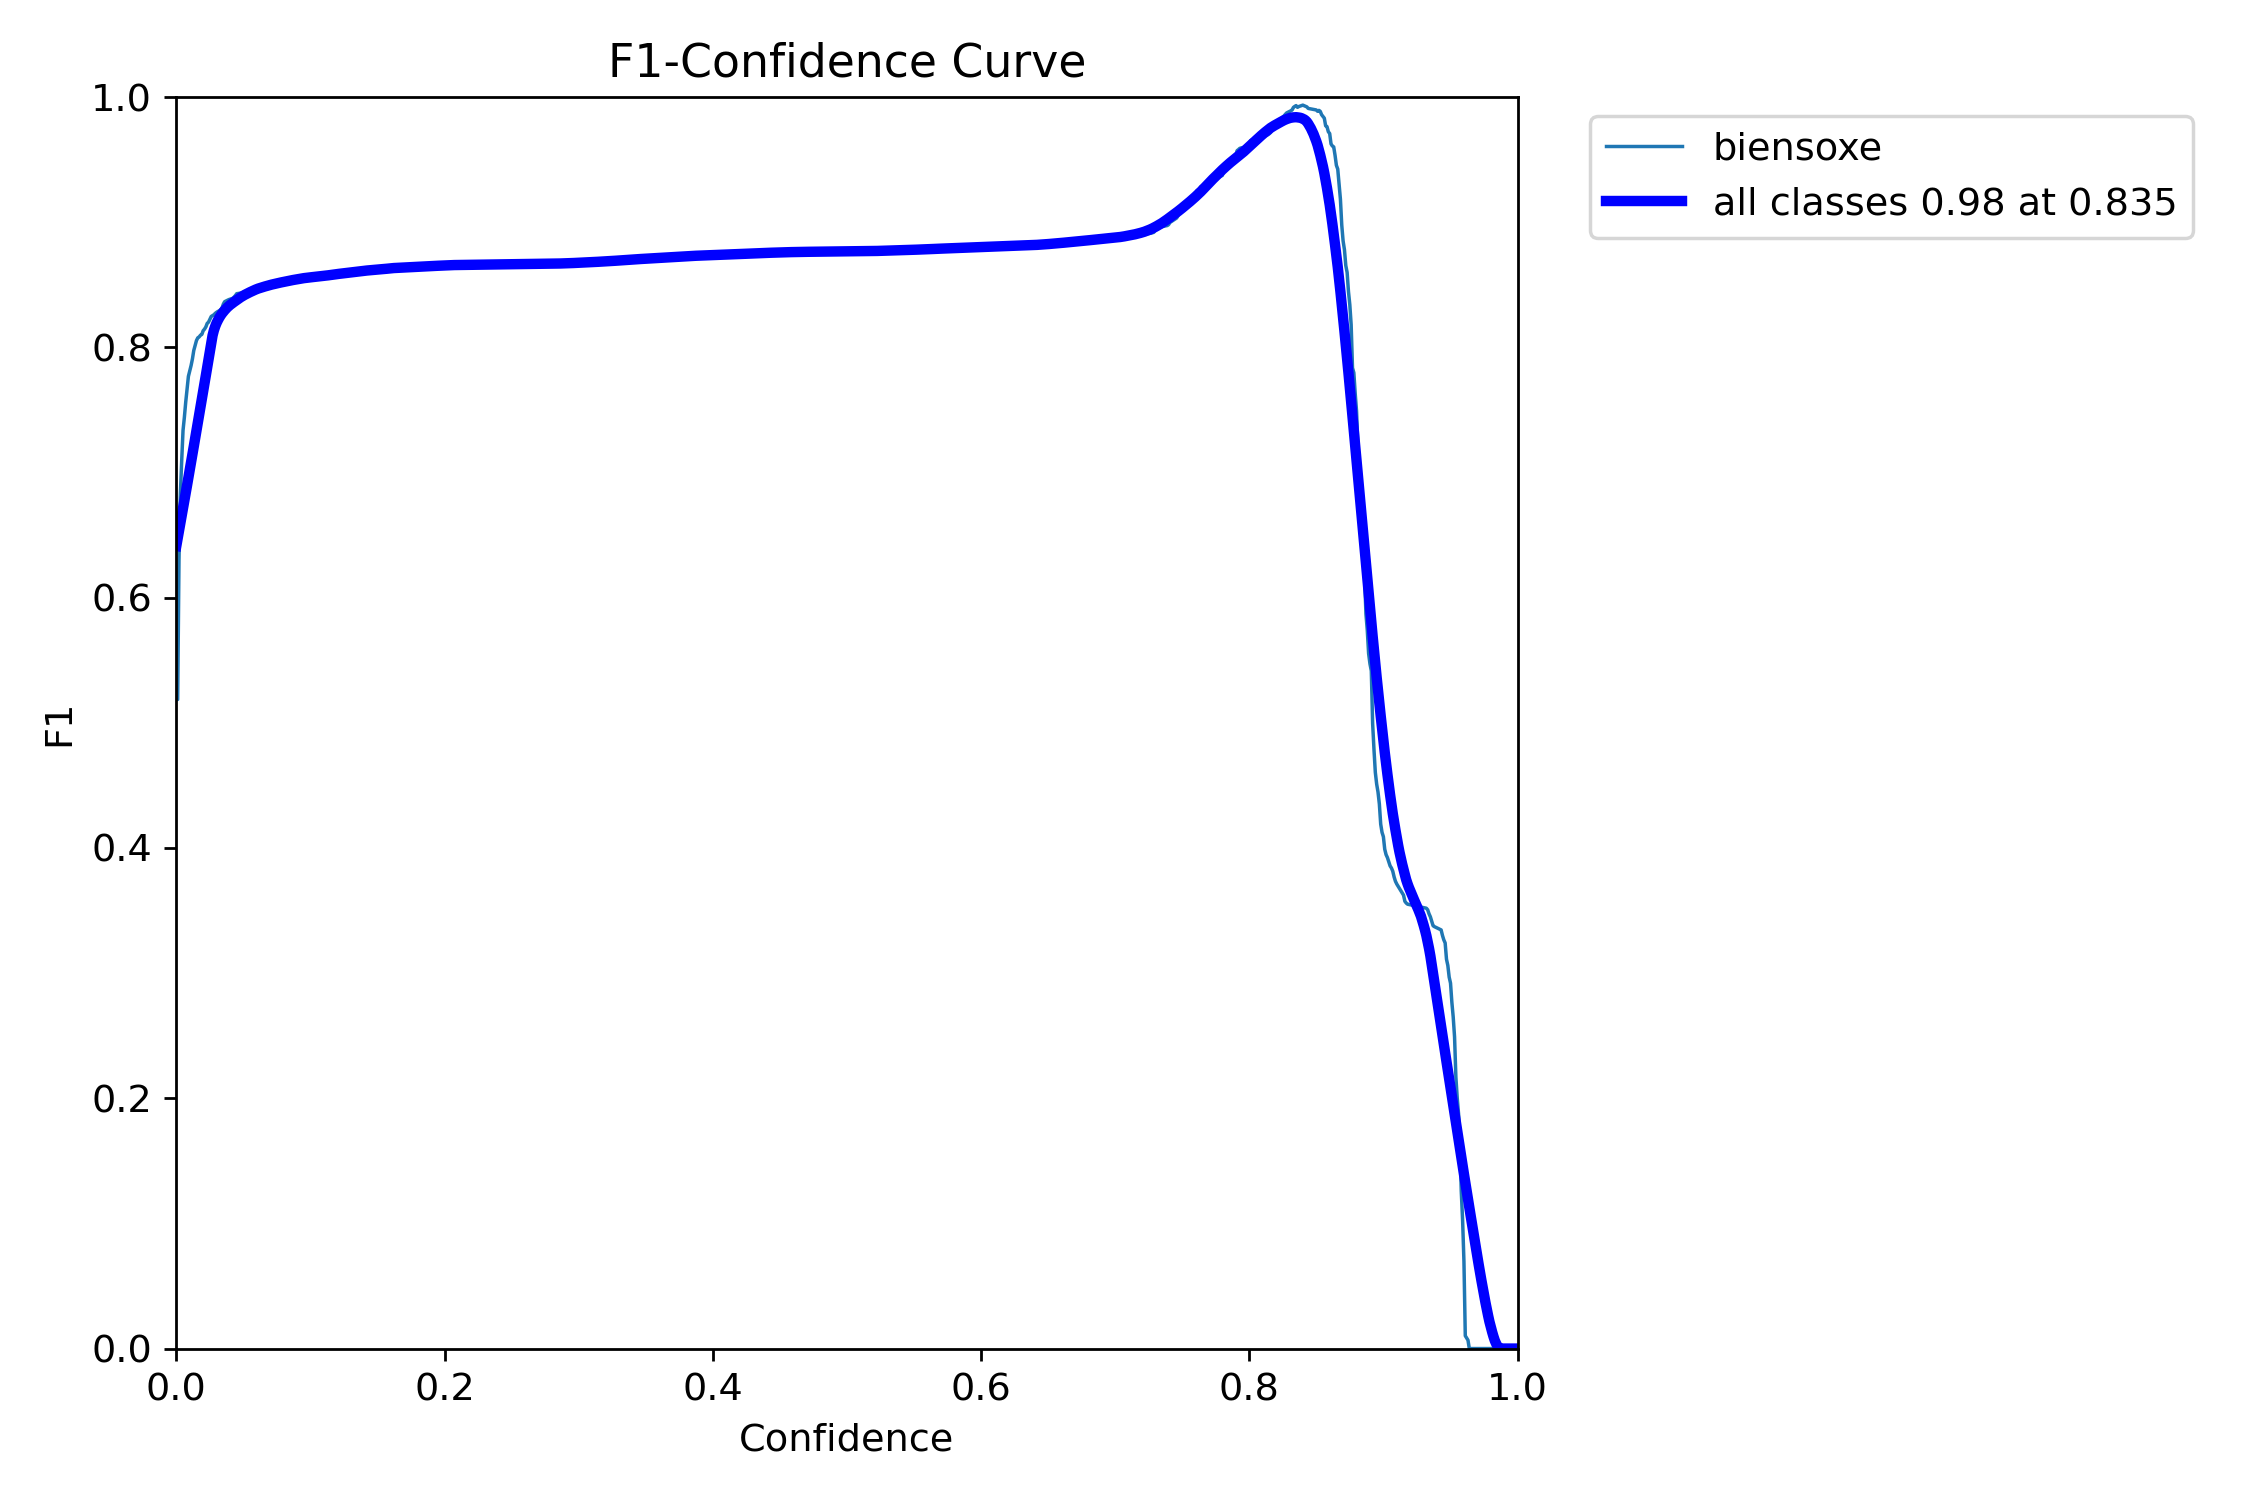

In [ ]:
Image(filename=f'/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/F1_curve.png', width=800)

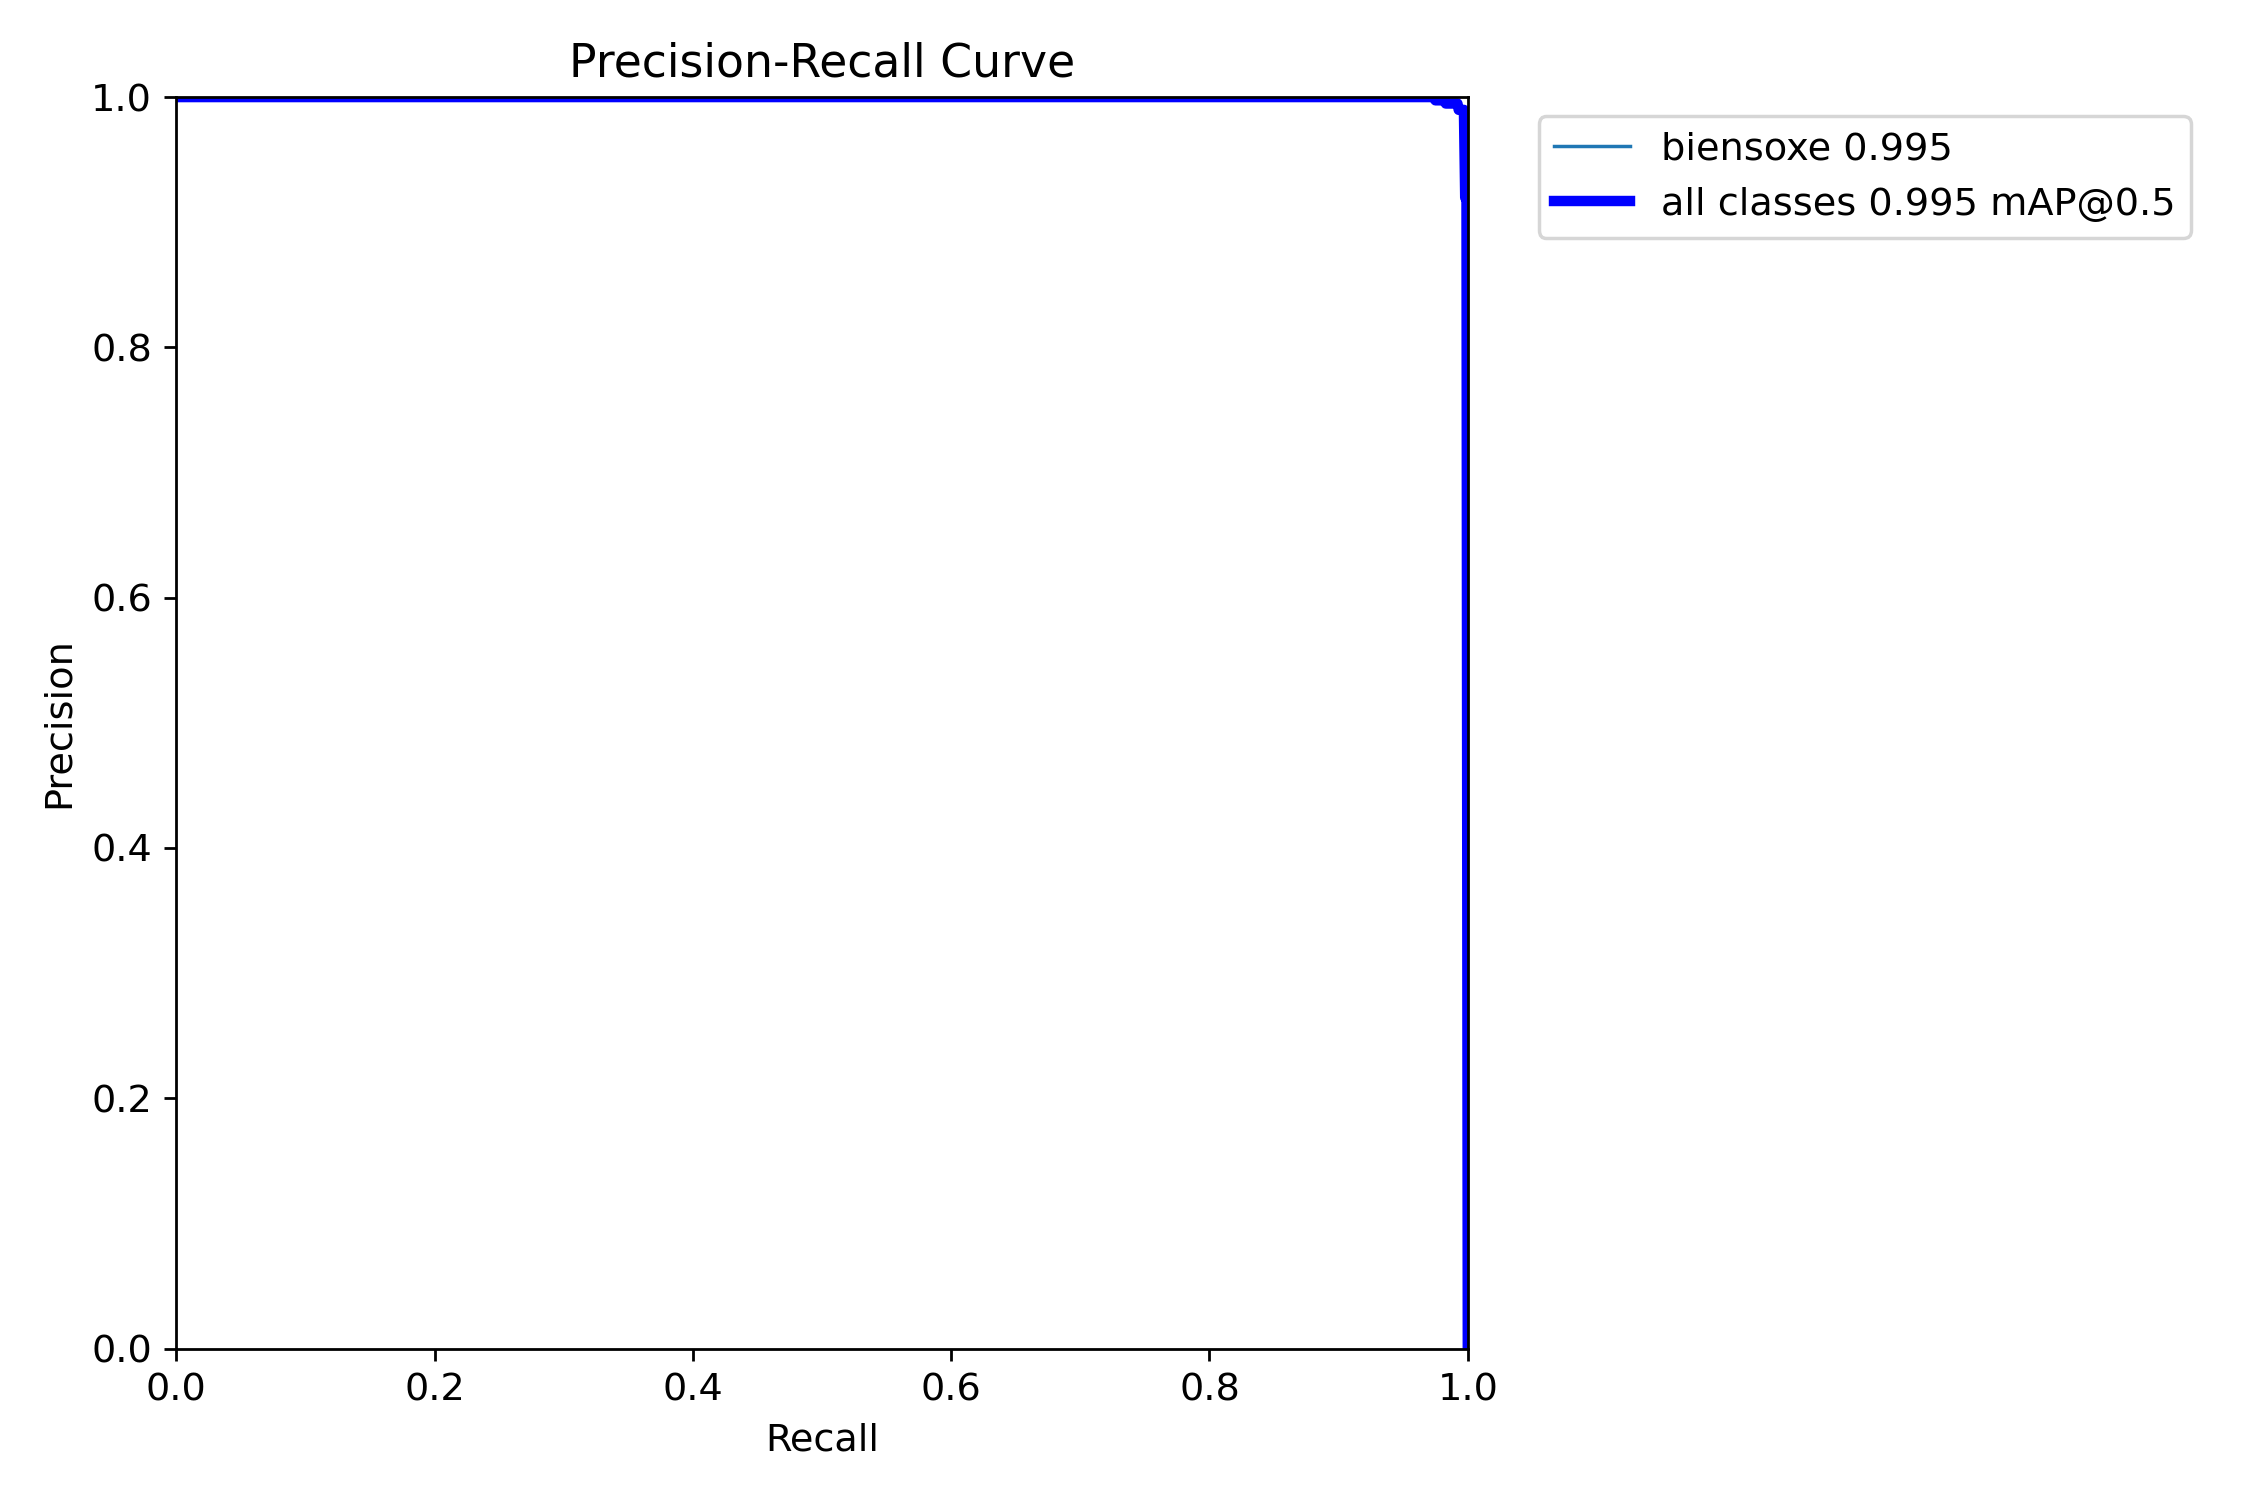

In [ ]:
Image(filename=f'/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/PR_curve.png', width=800)

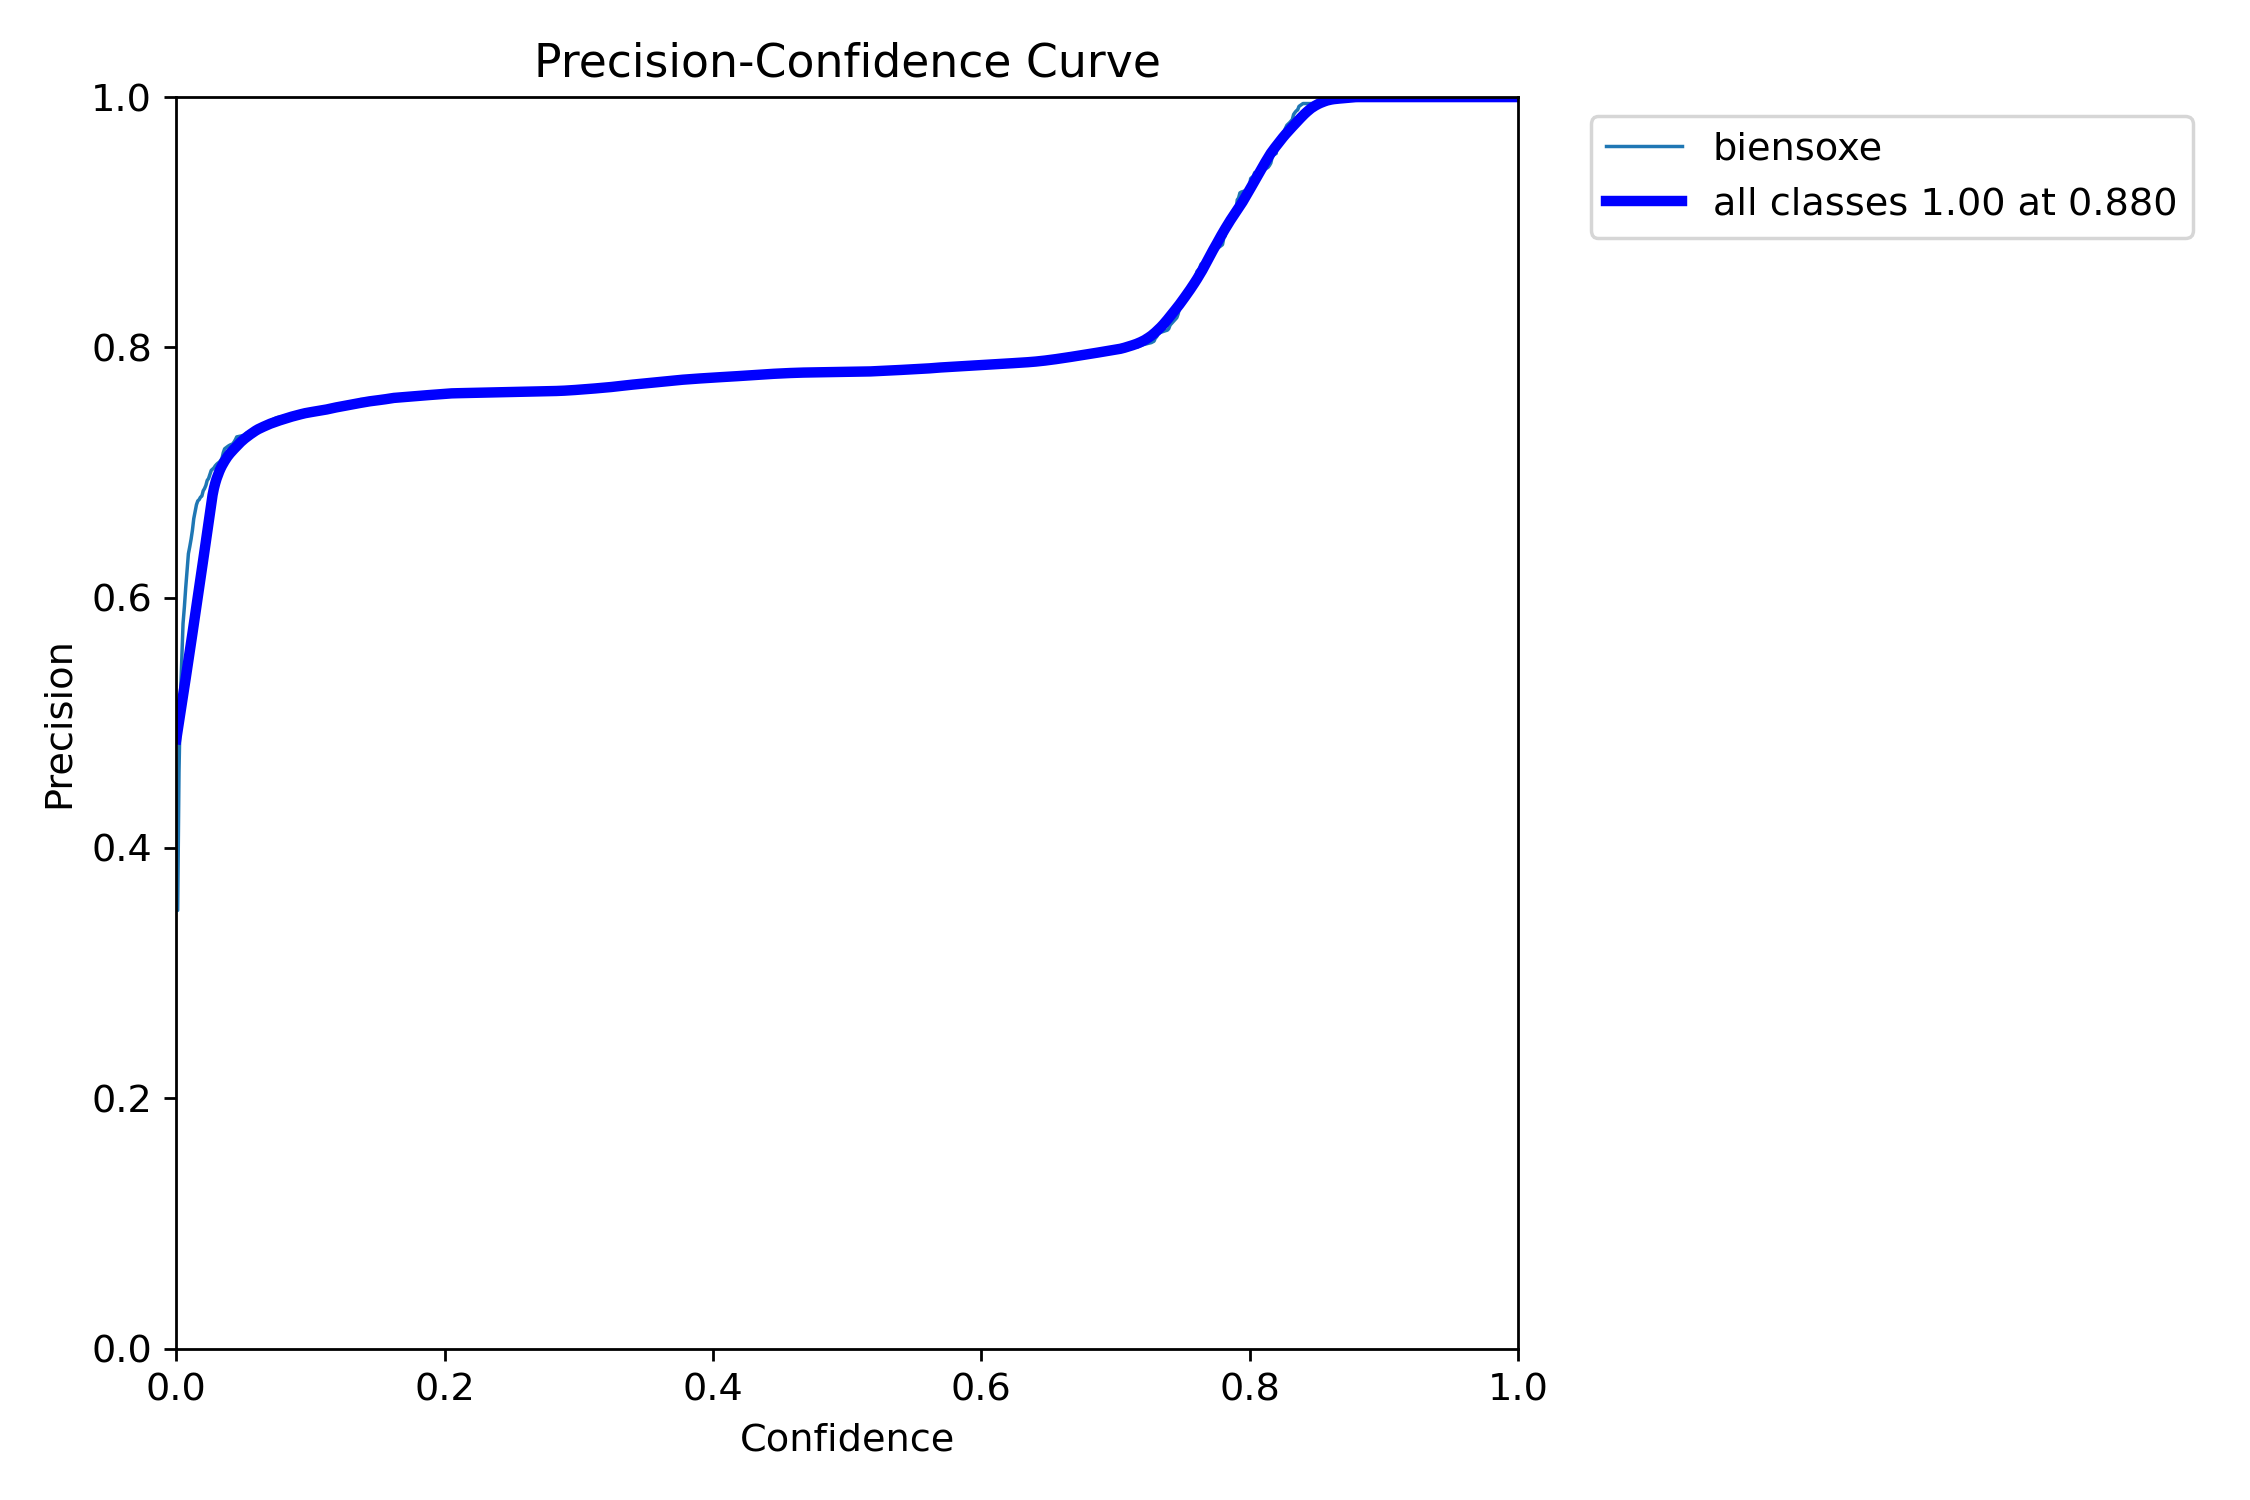

In [ ]:
Image(filename='/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/P_curve.png', width=800)

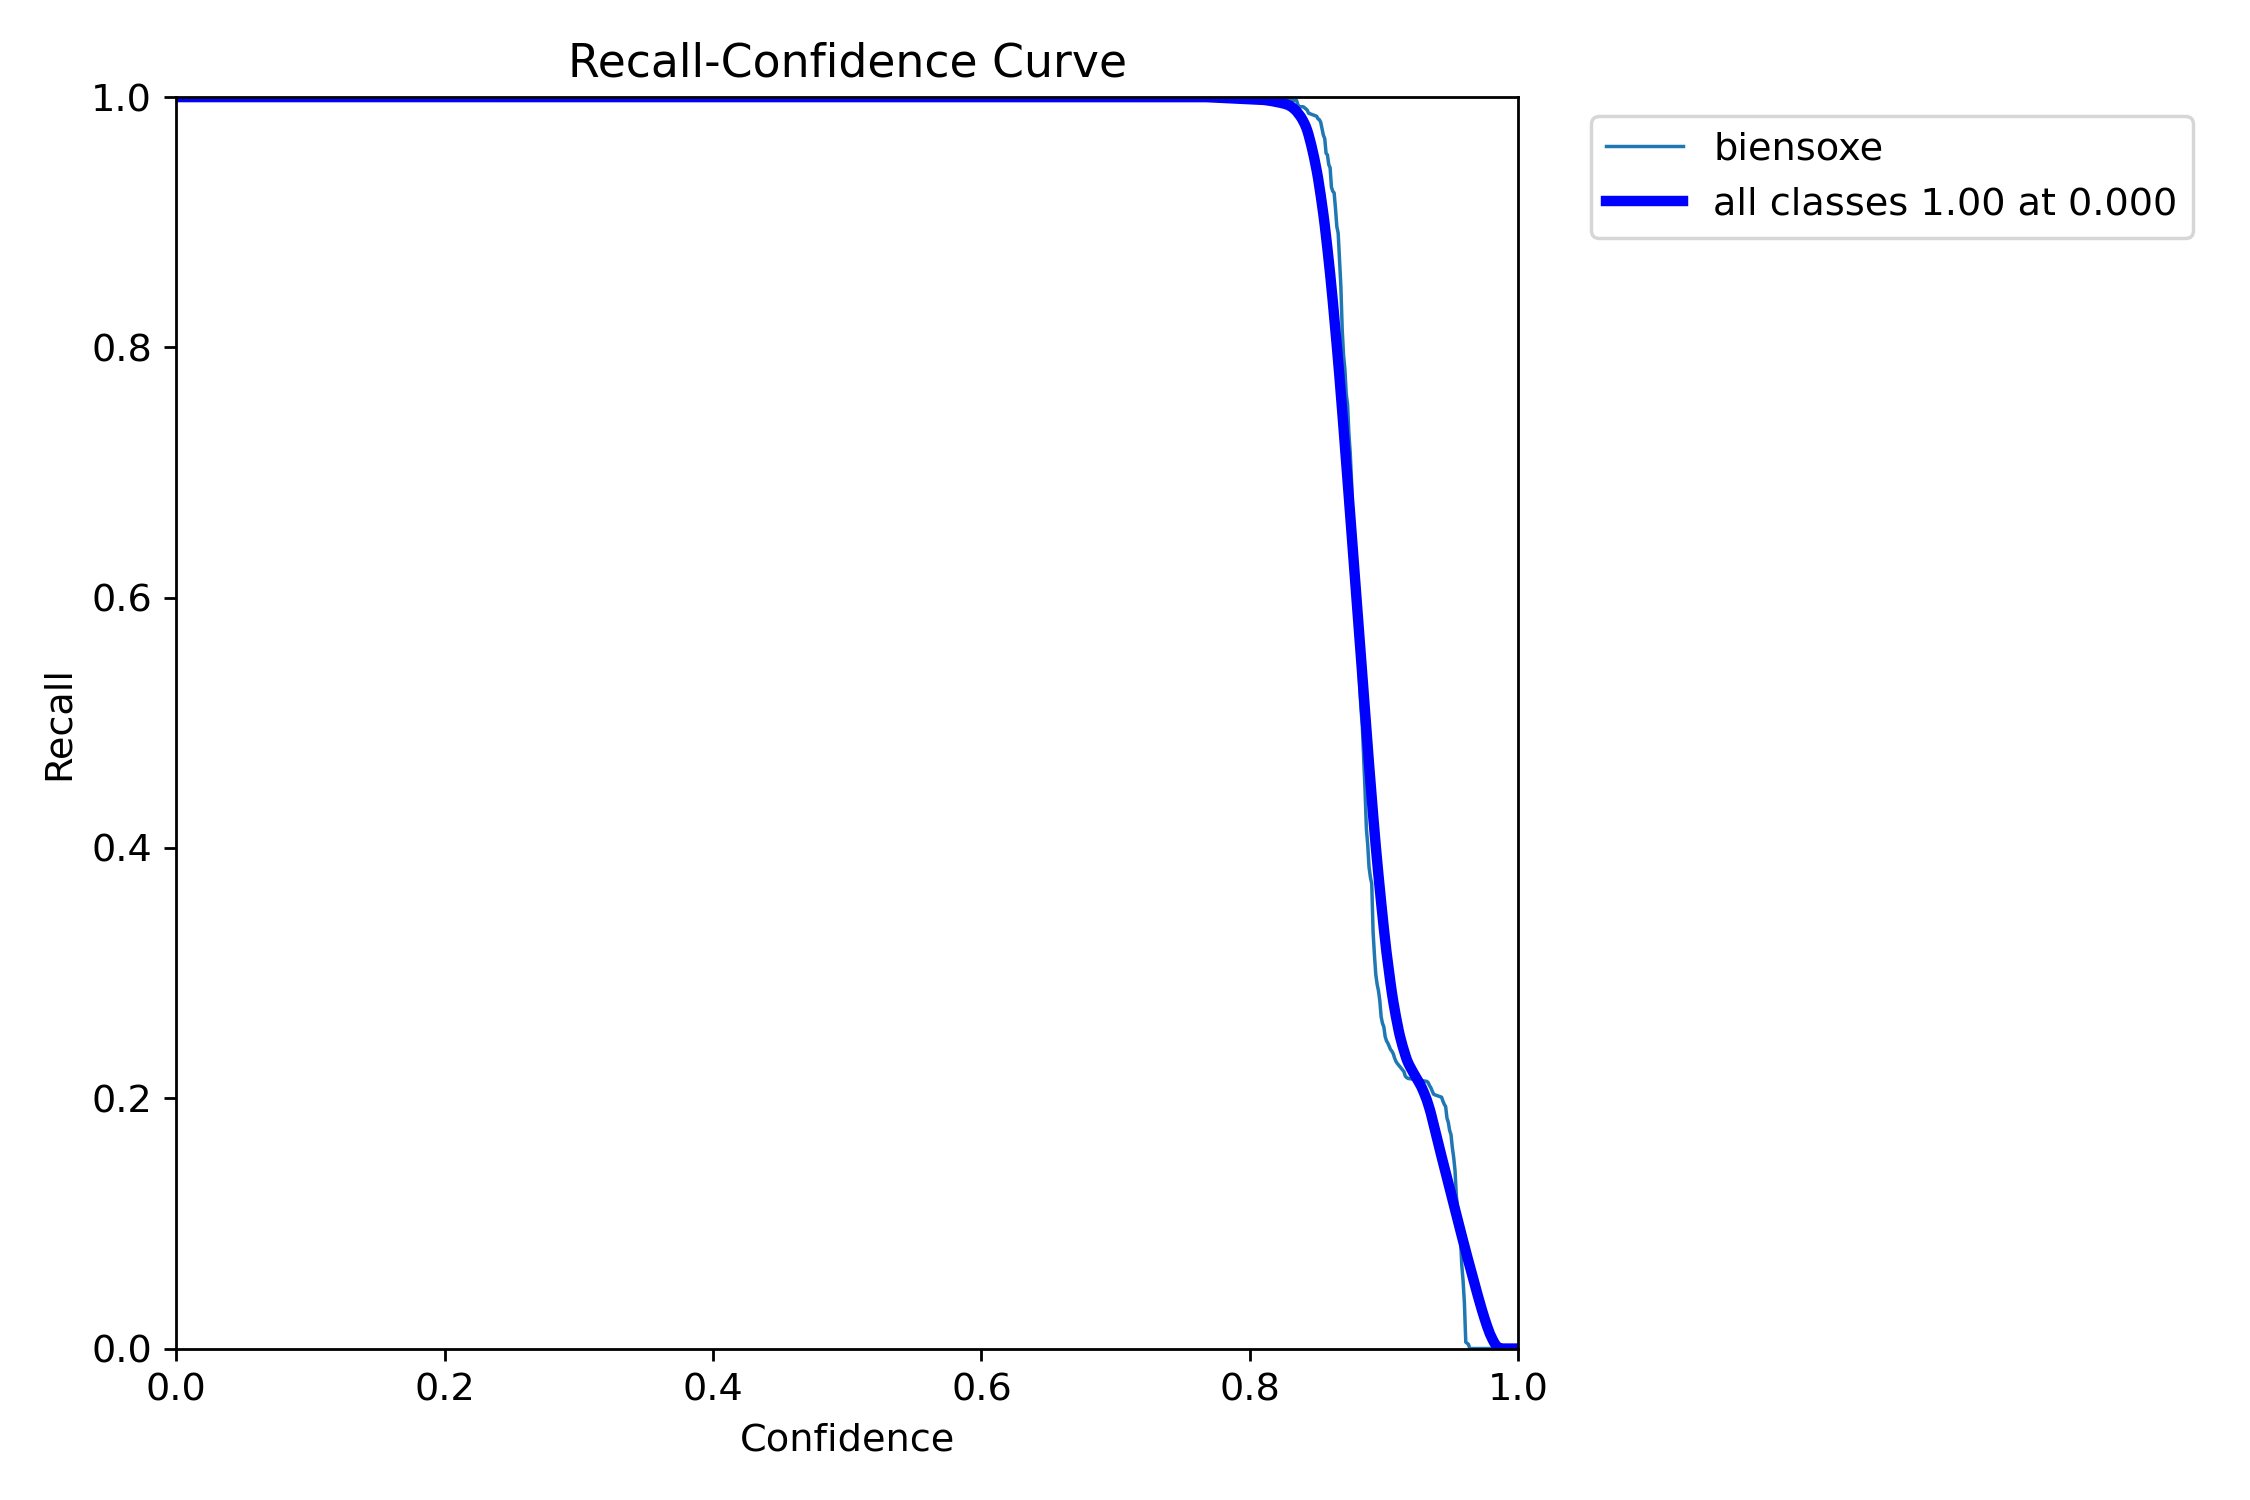

In [ ]:
Image(filename='/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/R_curve.png', width=600)

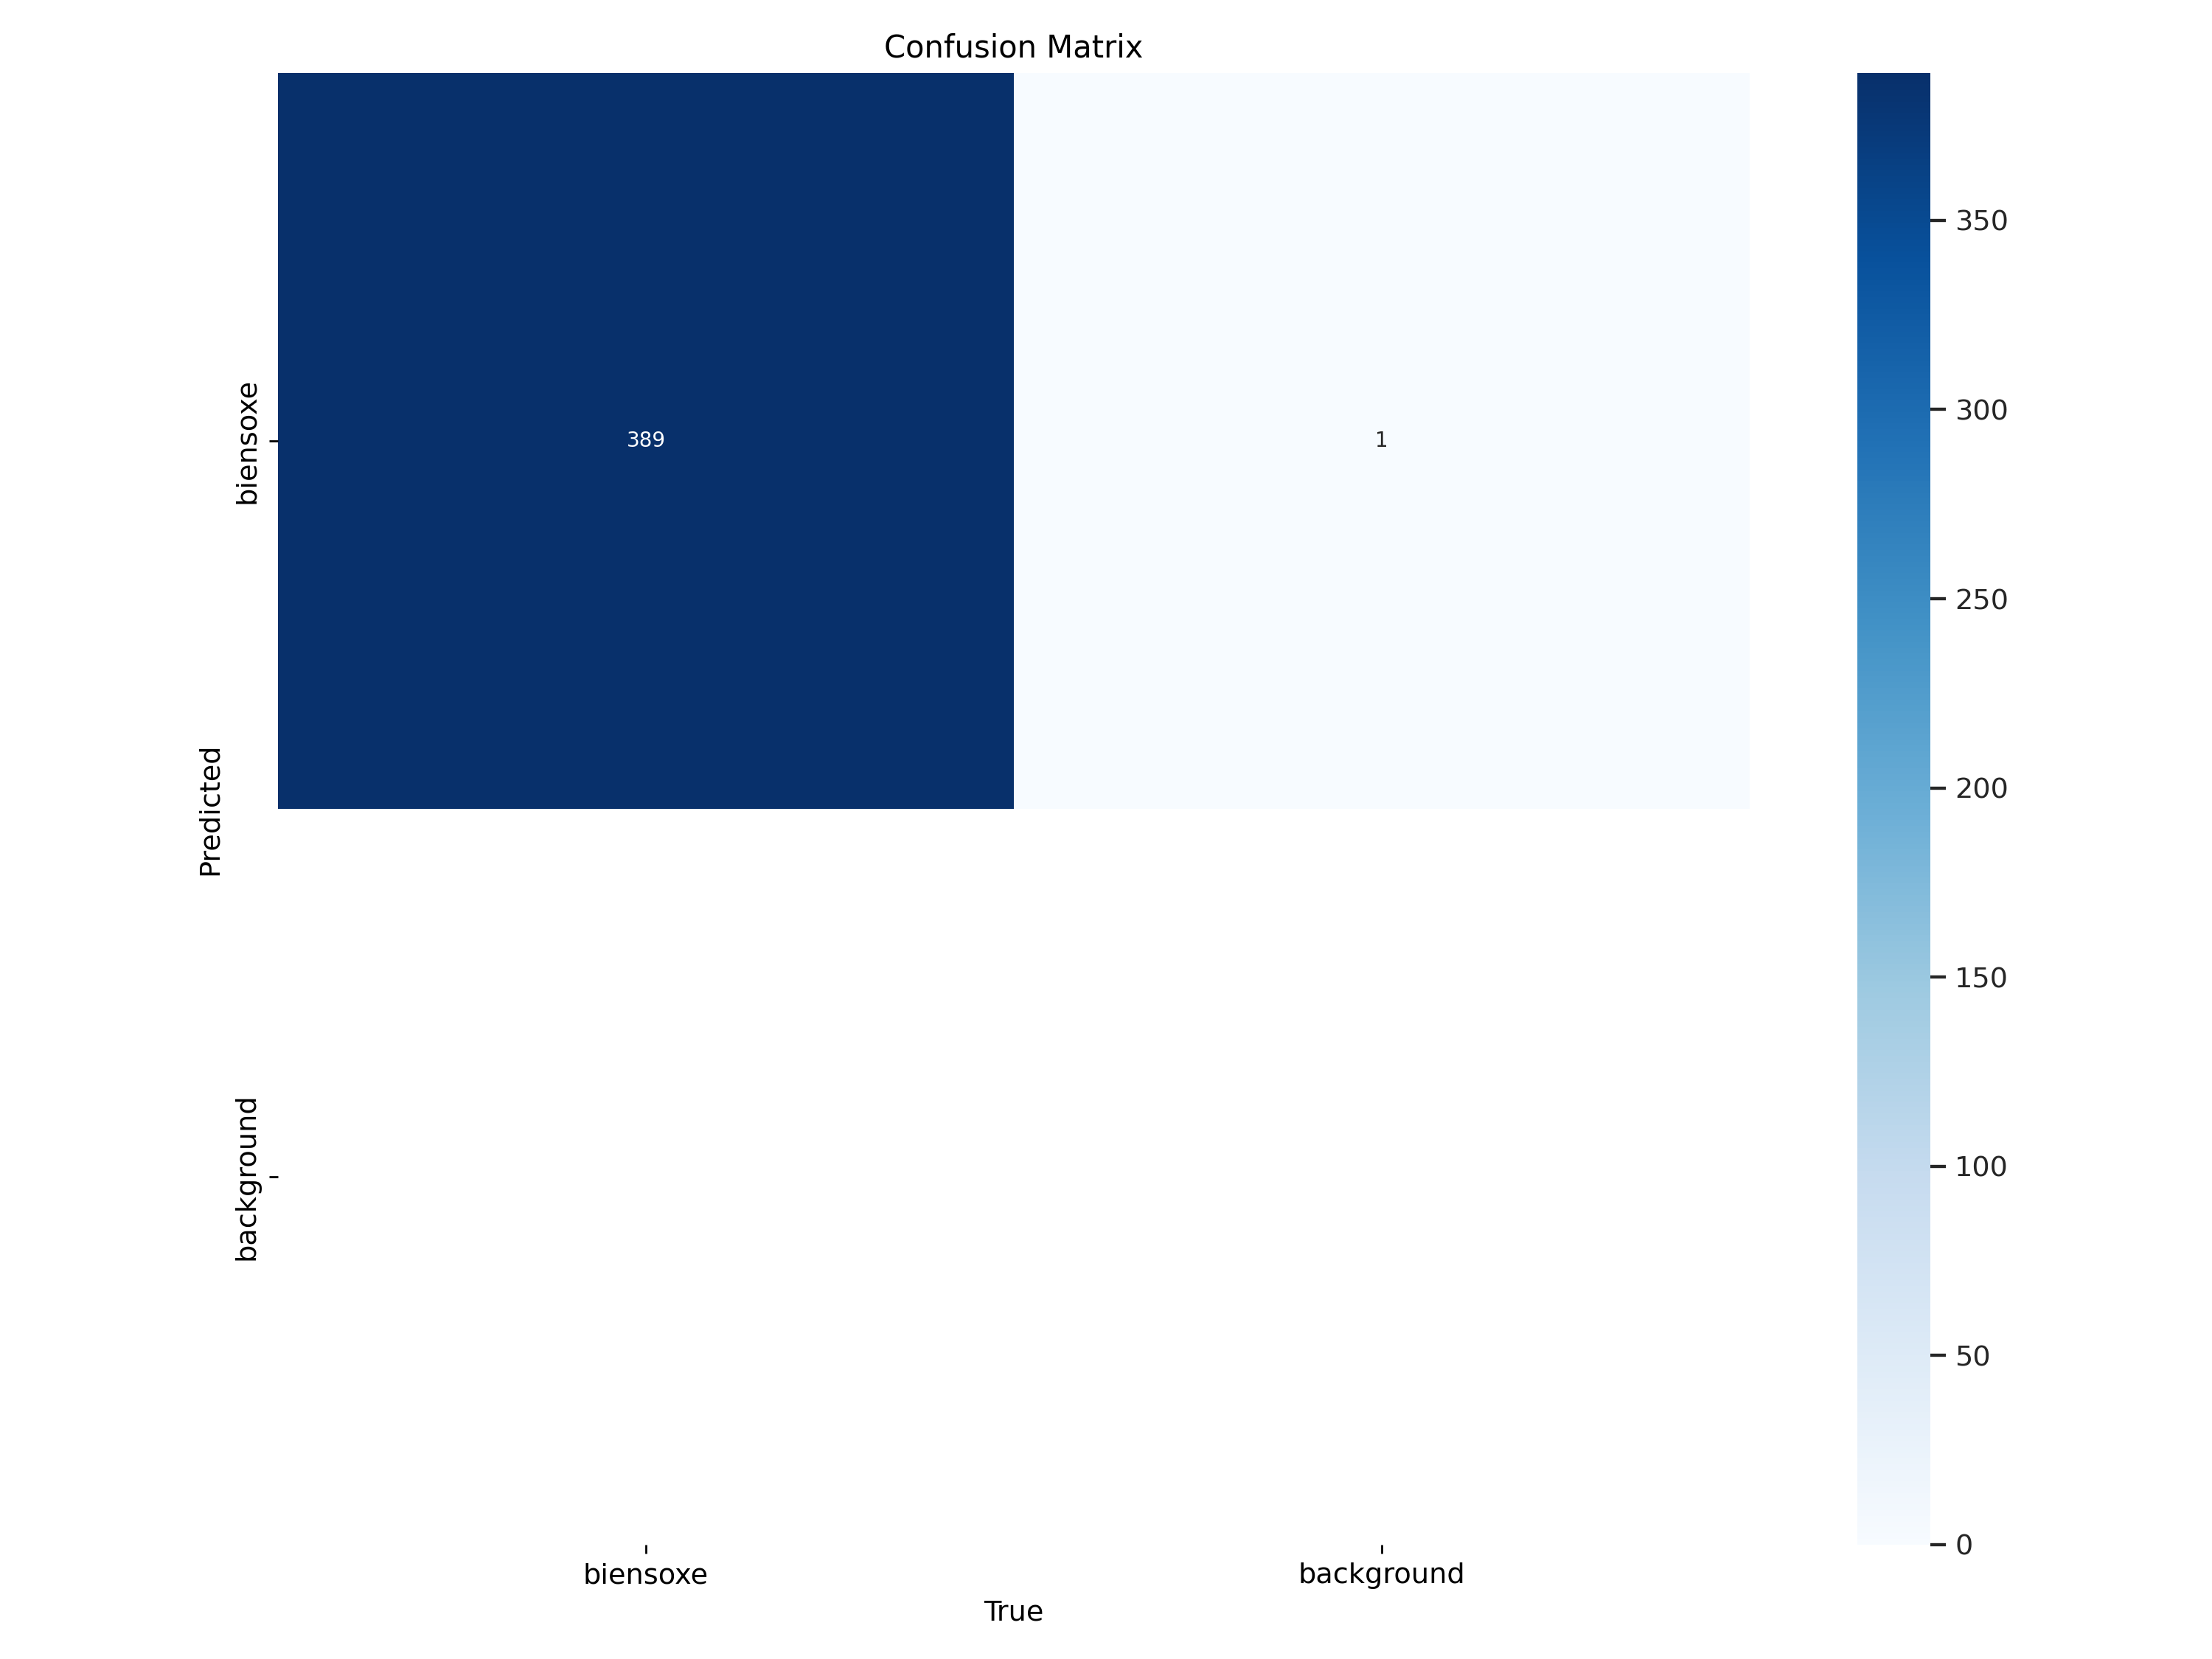

In [ ]:
Image(filename='/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/confusion_matrix.png', width=700)

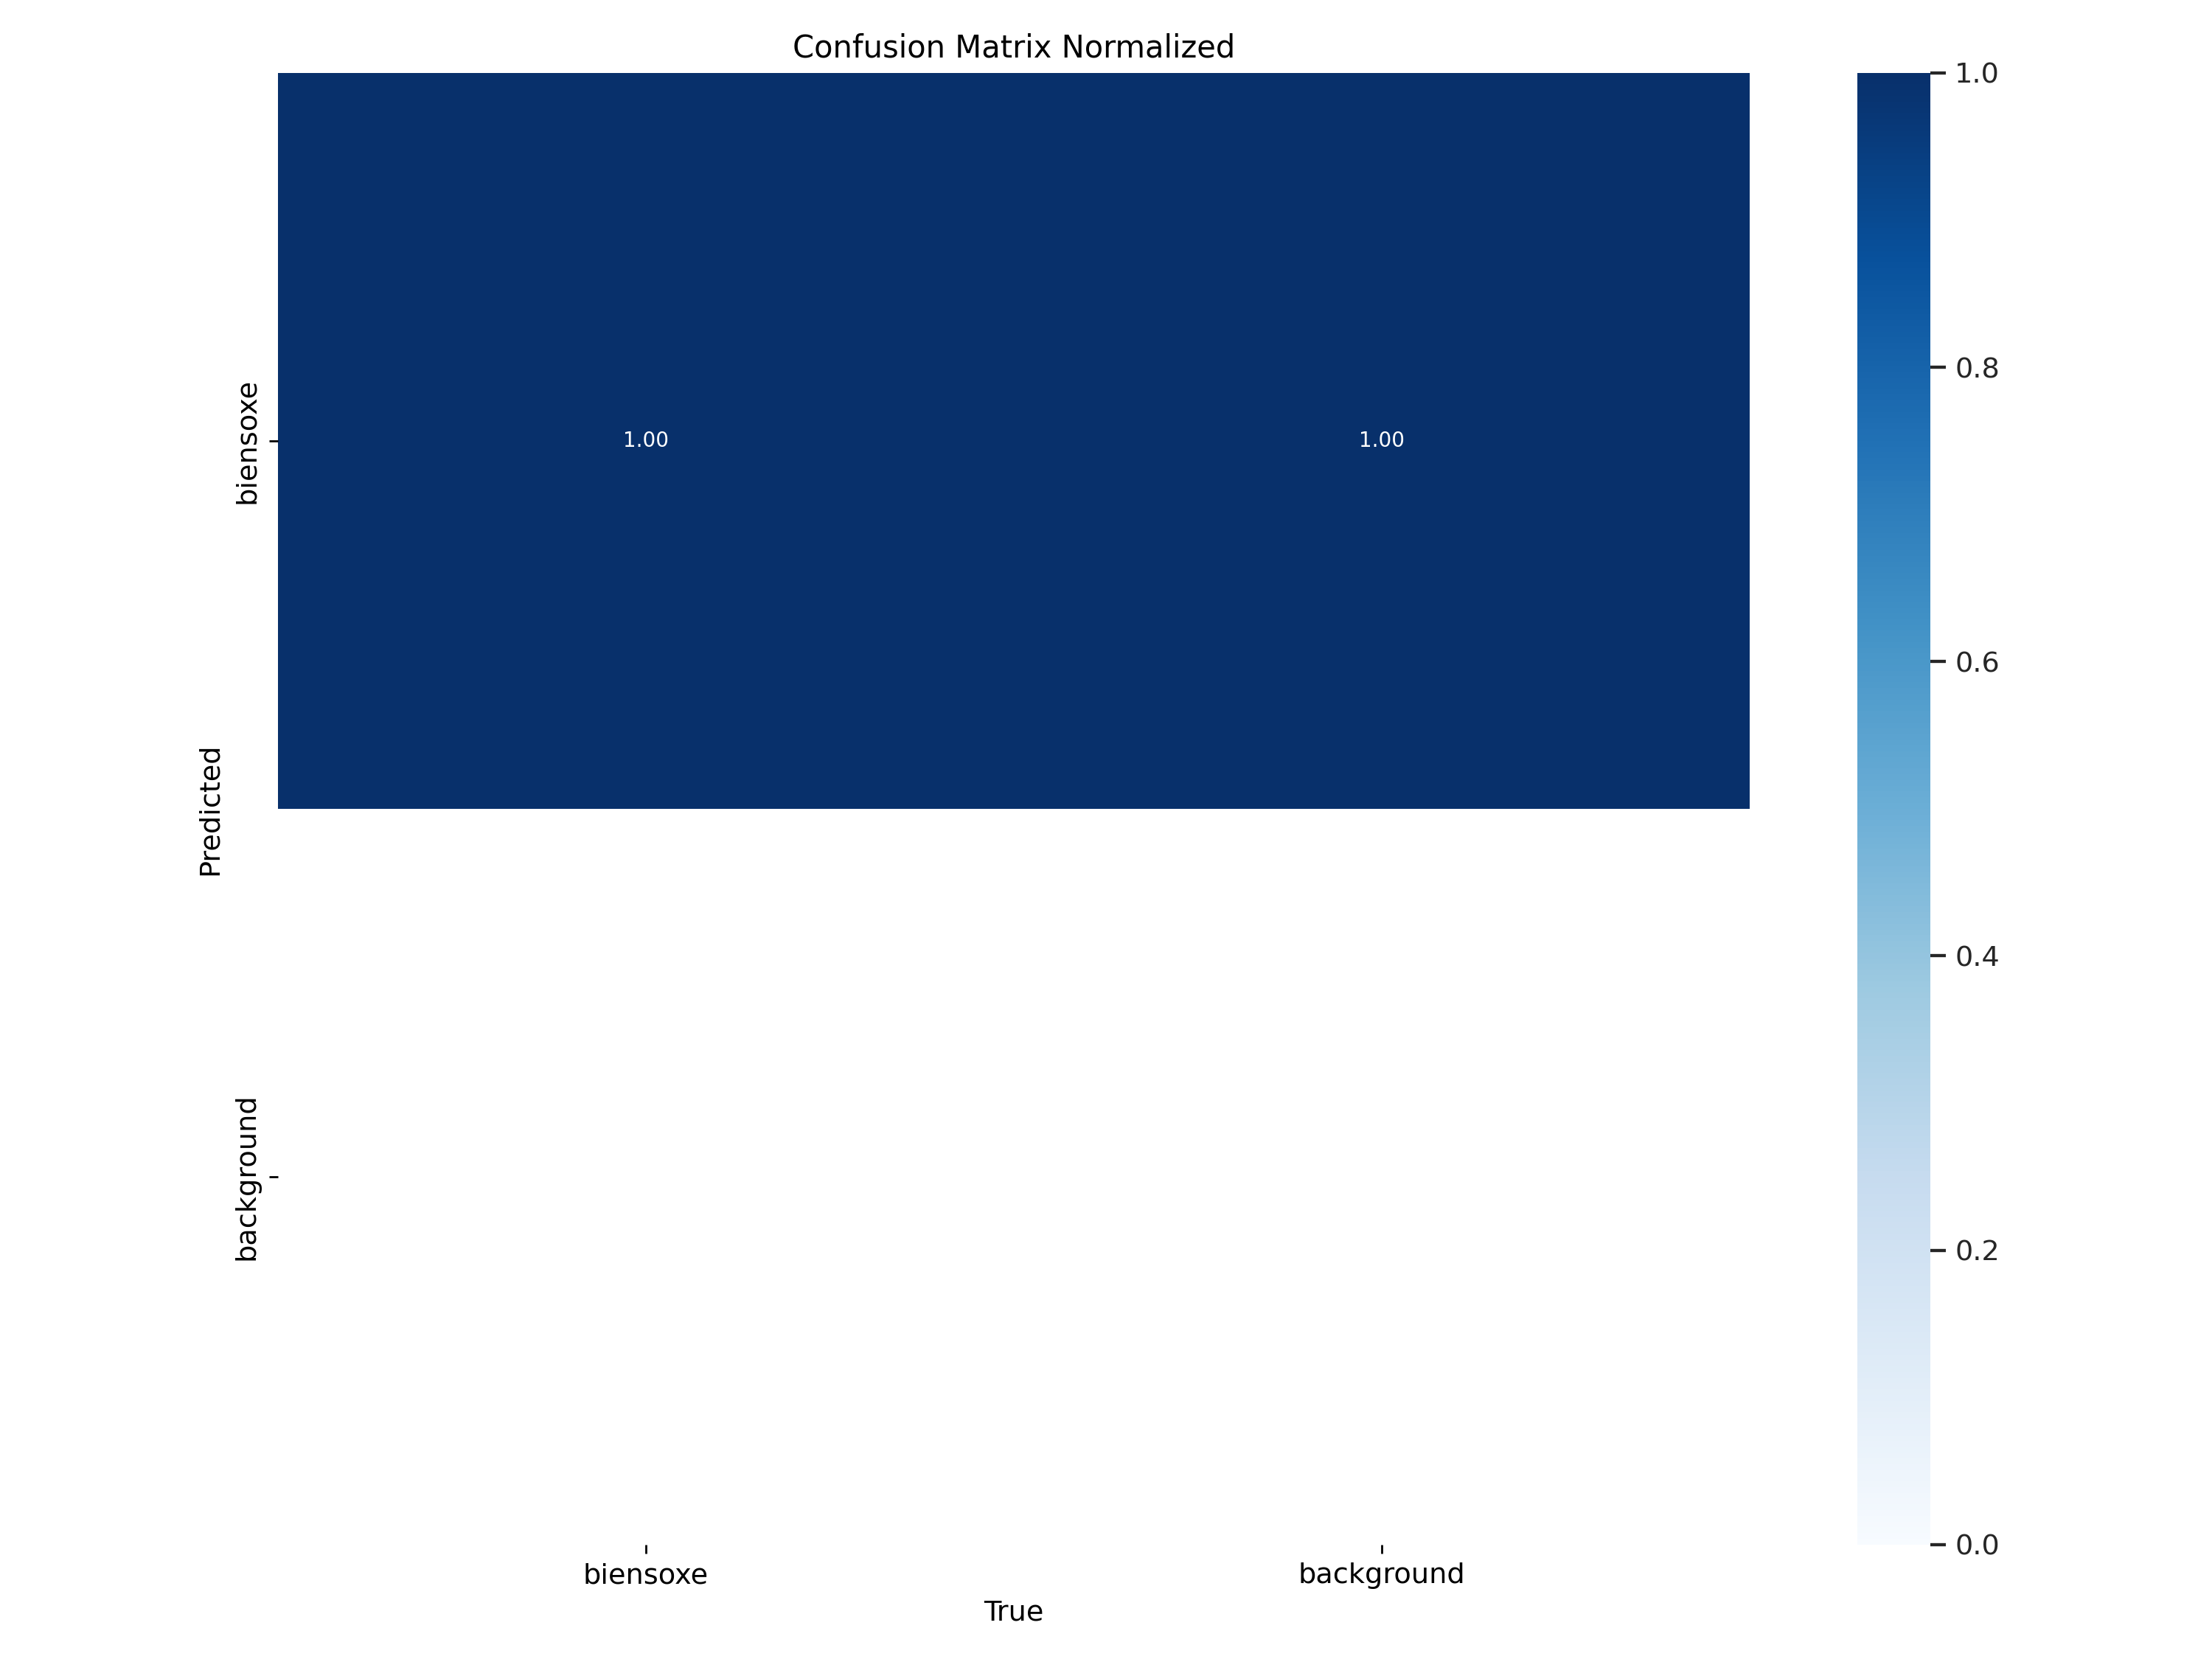

In [ ]:
Image(filename='/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/confusion_matrix_normalized.png', width=800)

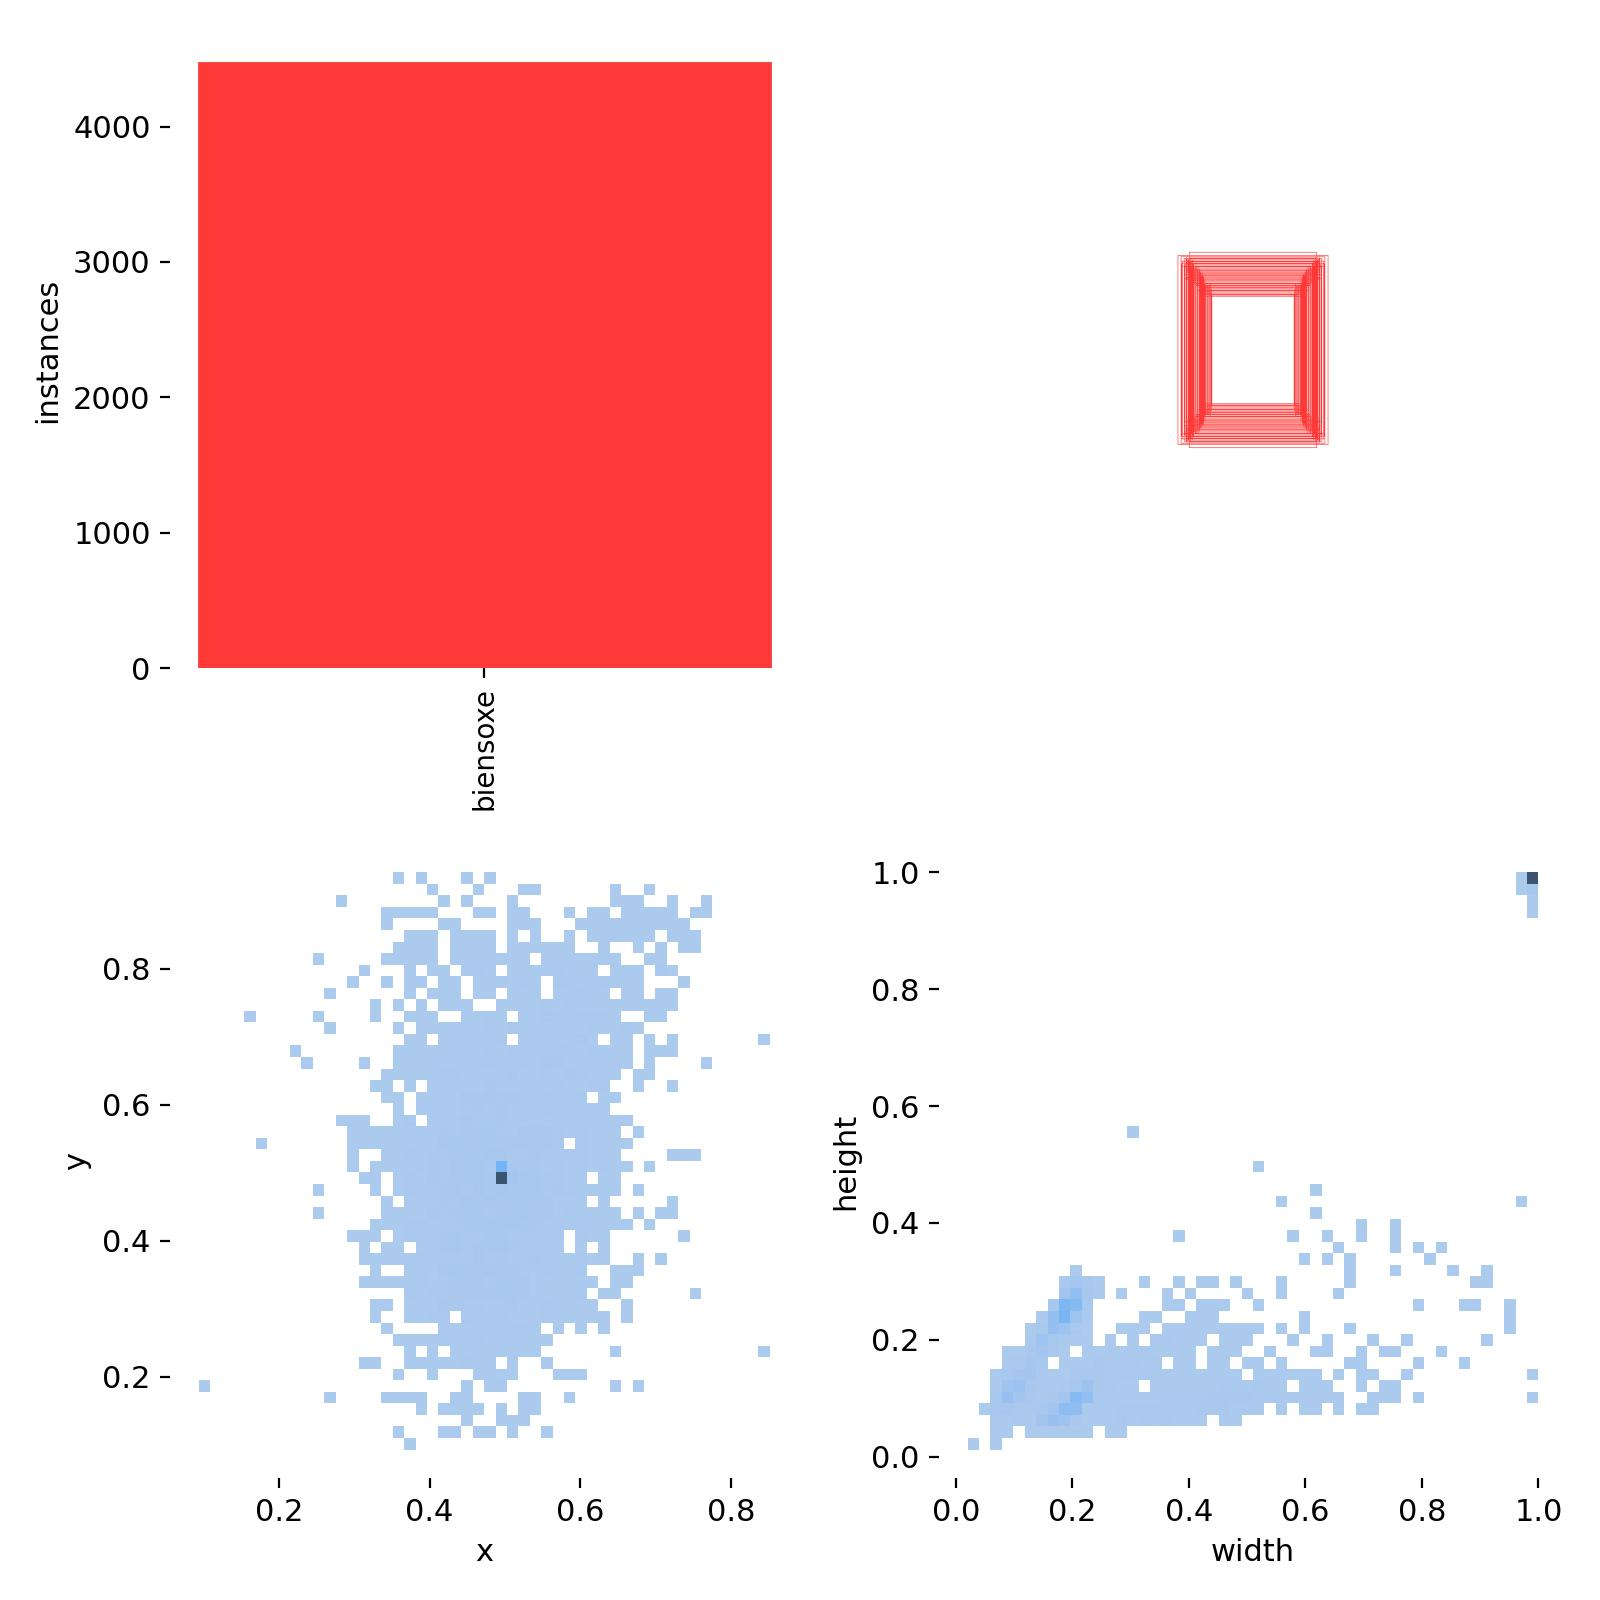

In [ ]:
Image(filename='/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/labels.jpg', width=600)

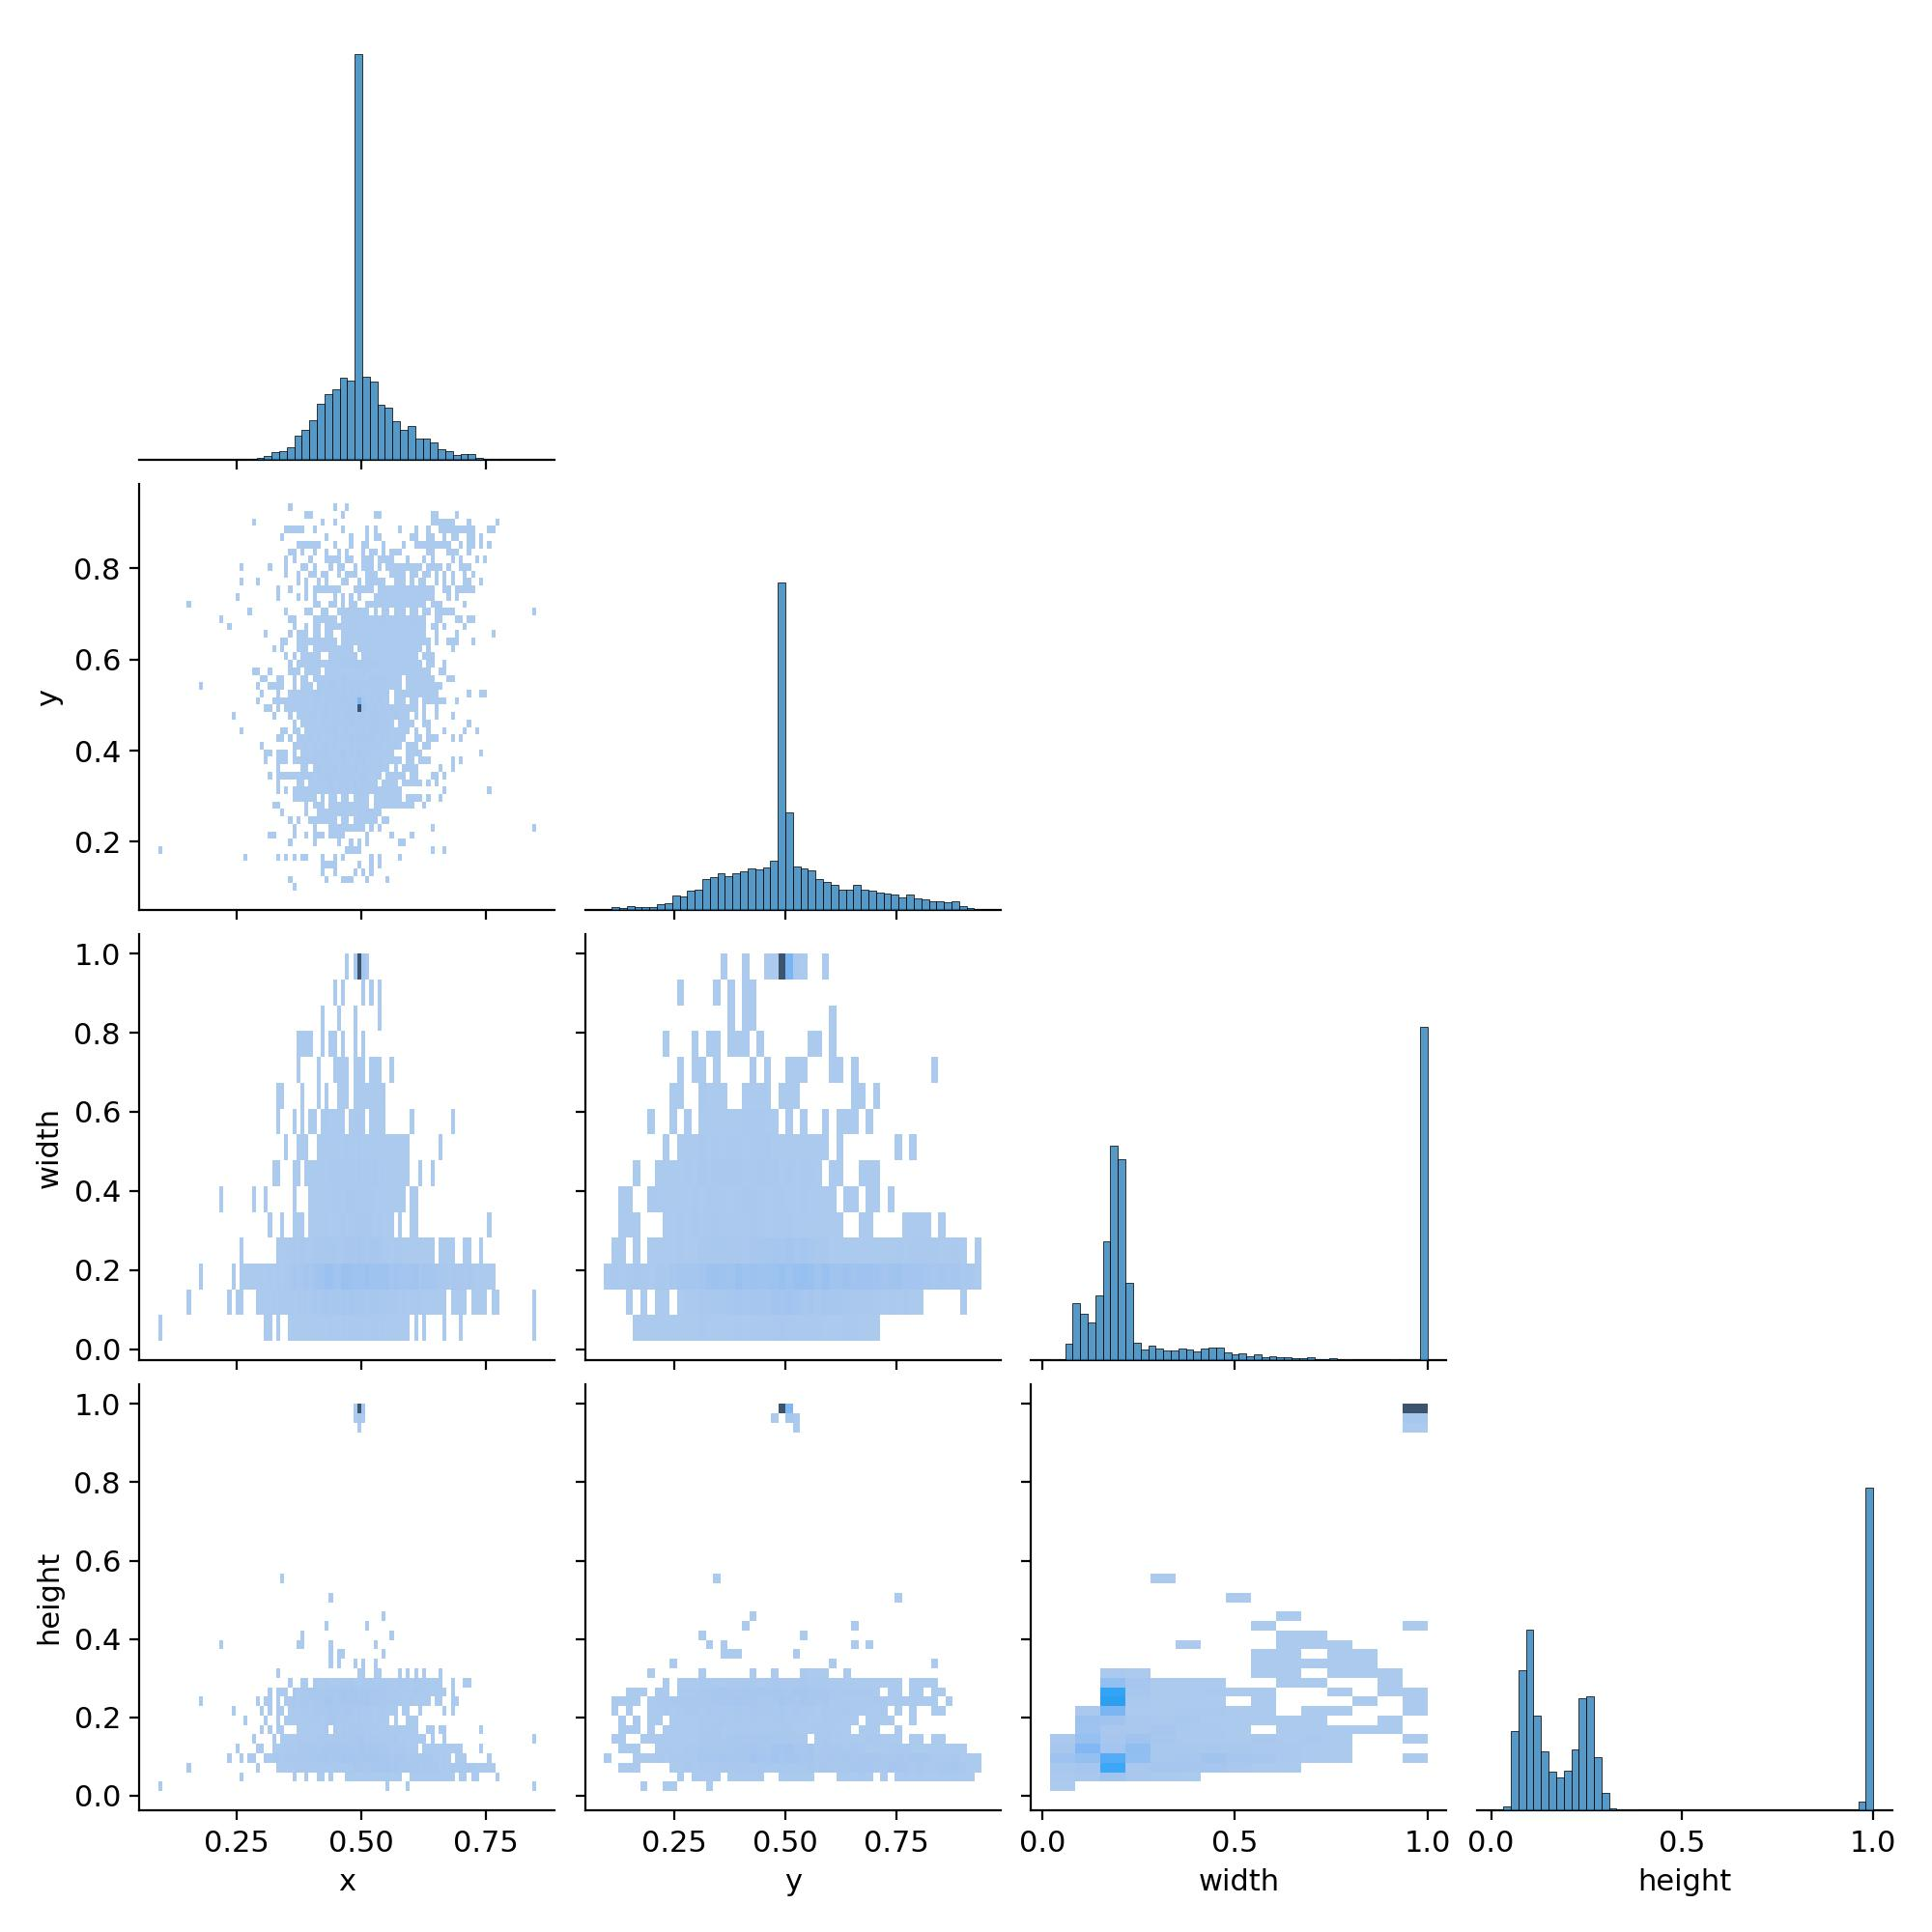

In [ ]:
Image(filename='/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/labels_correlogram.jpg', width=800)

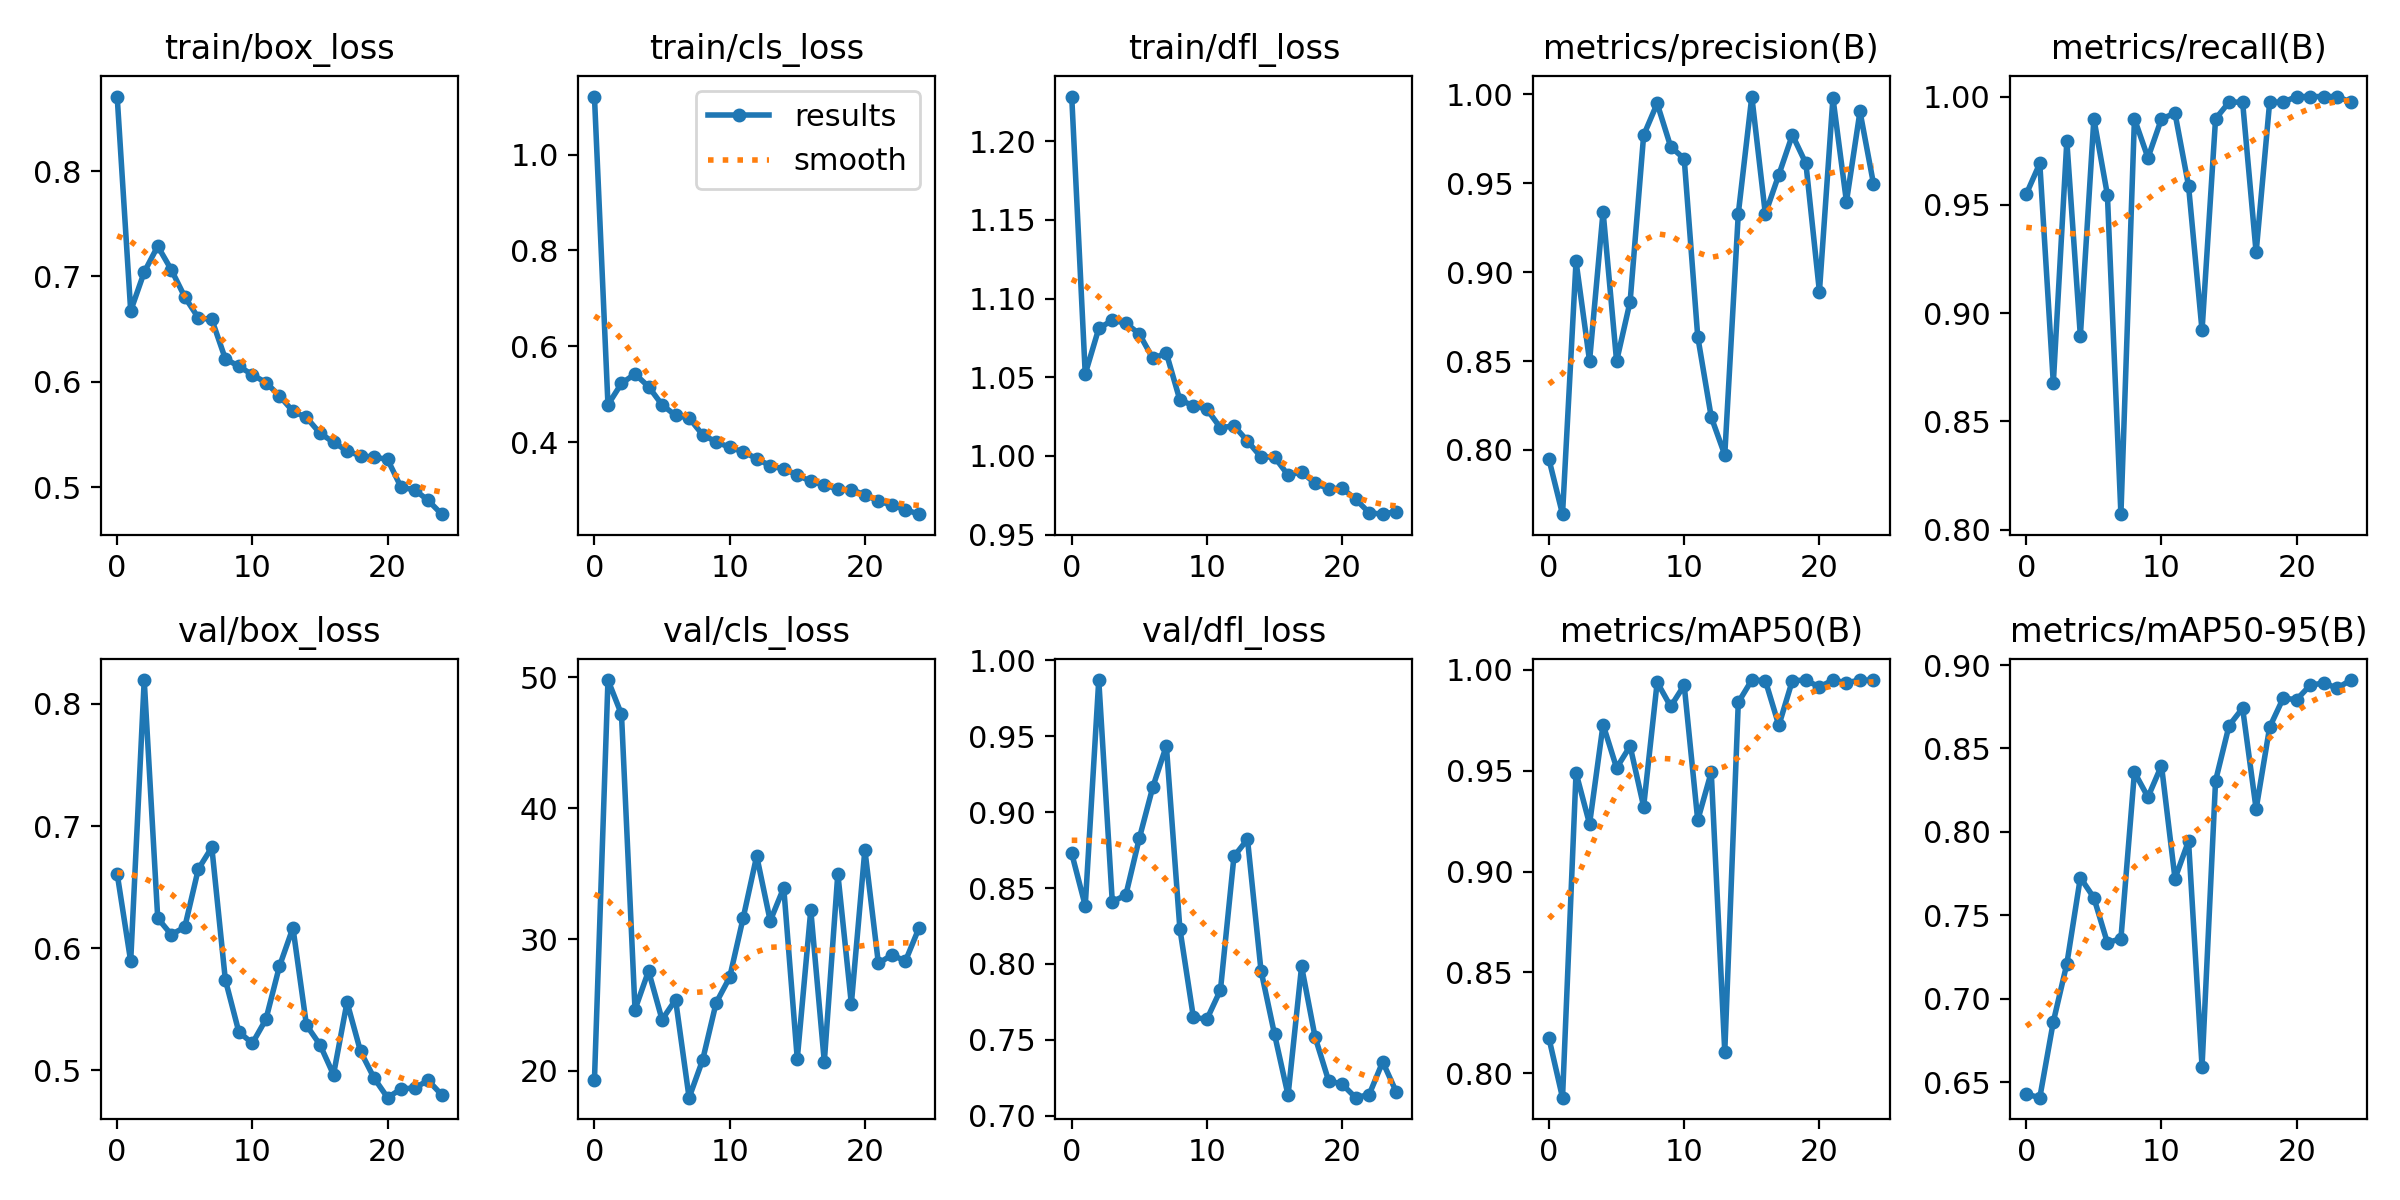

In [ ]:
Image('/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/results.png', width=800)

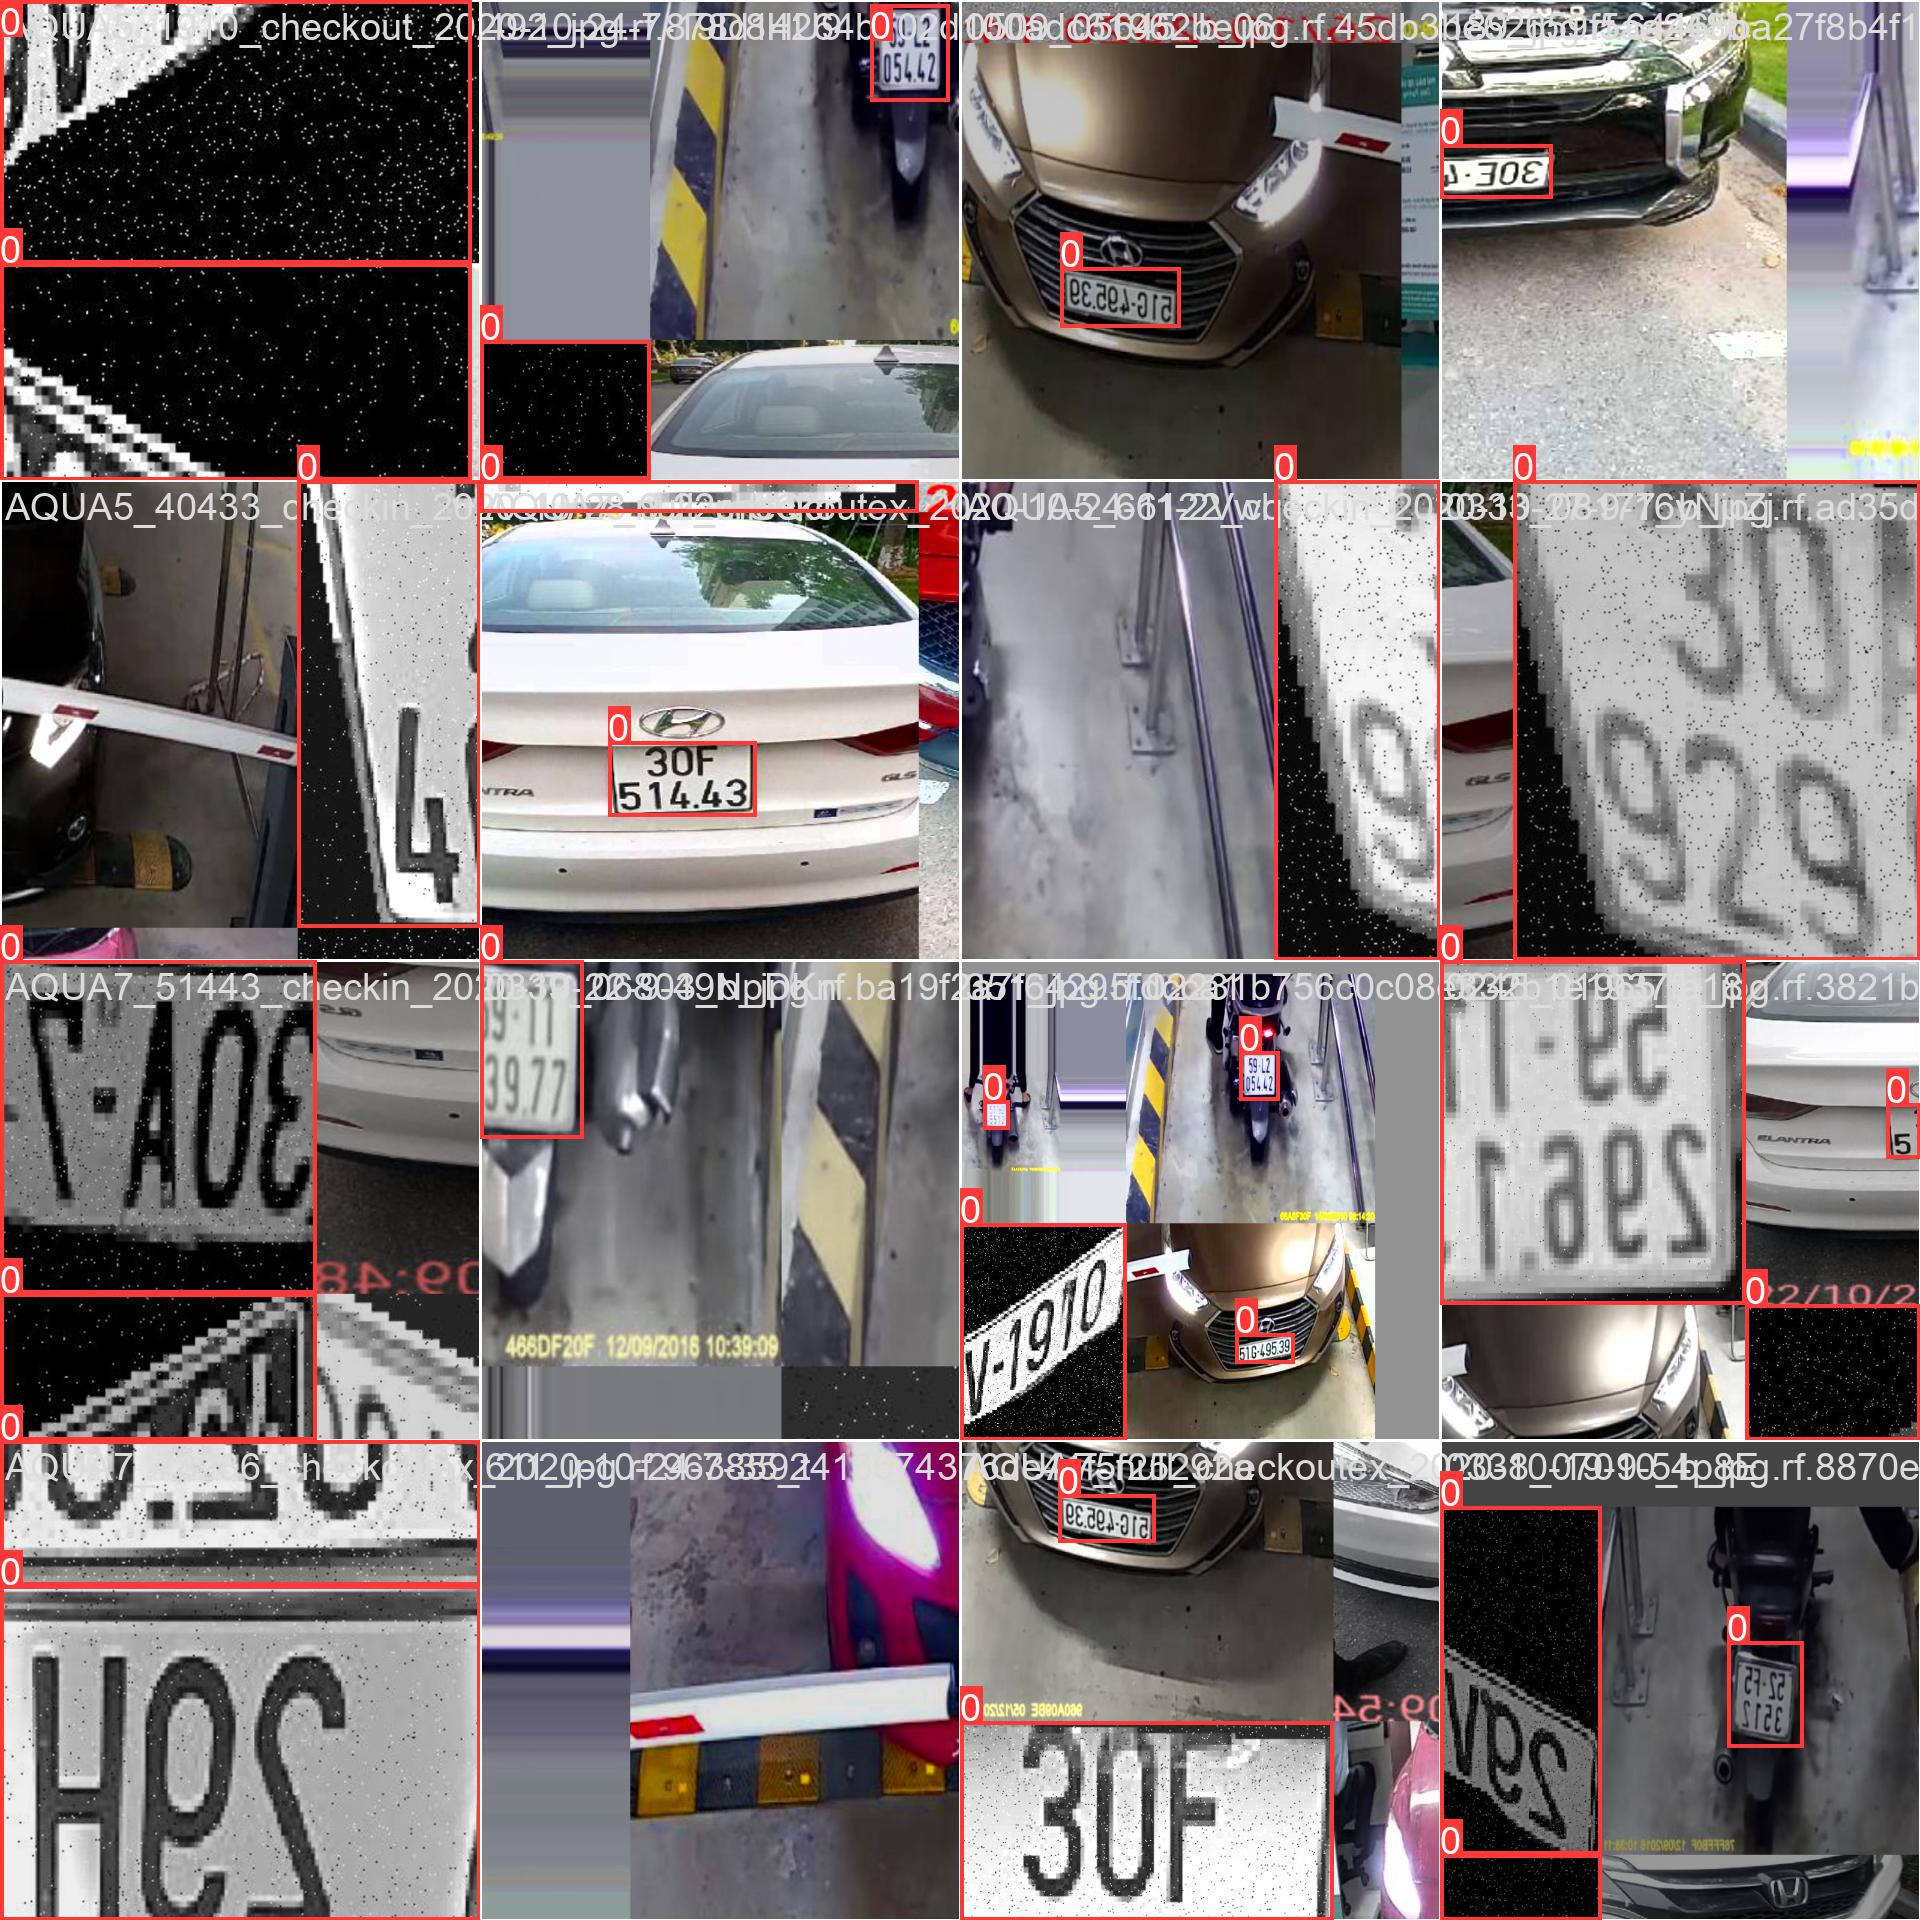

In [ ]:
Image(filename='/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/train_batch2.jpg', width=800)
      

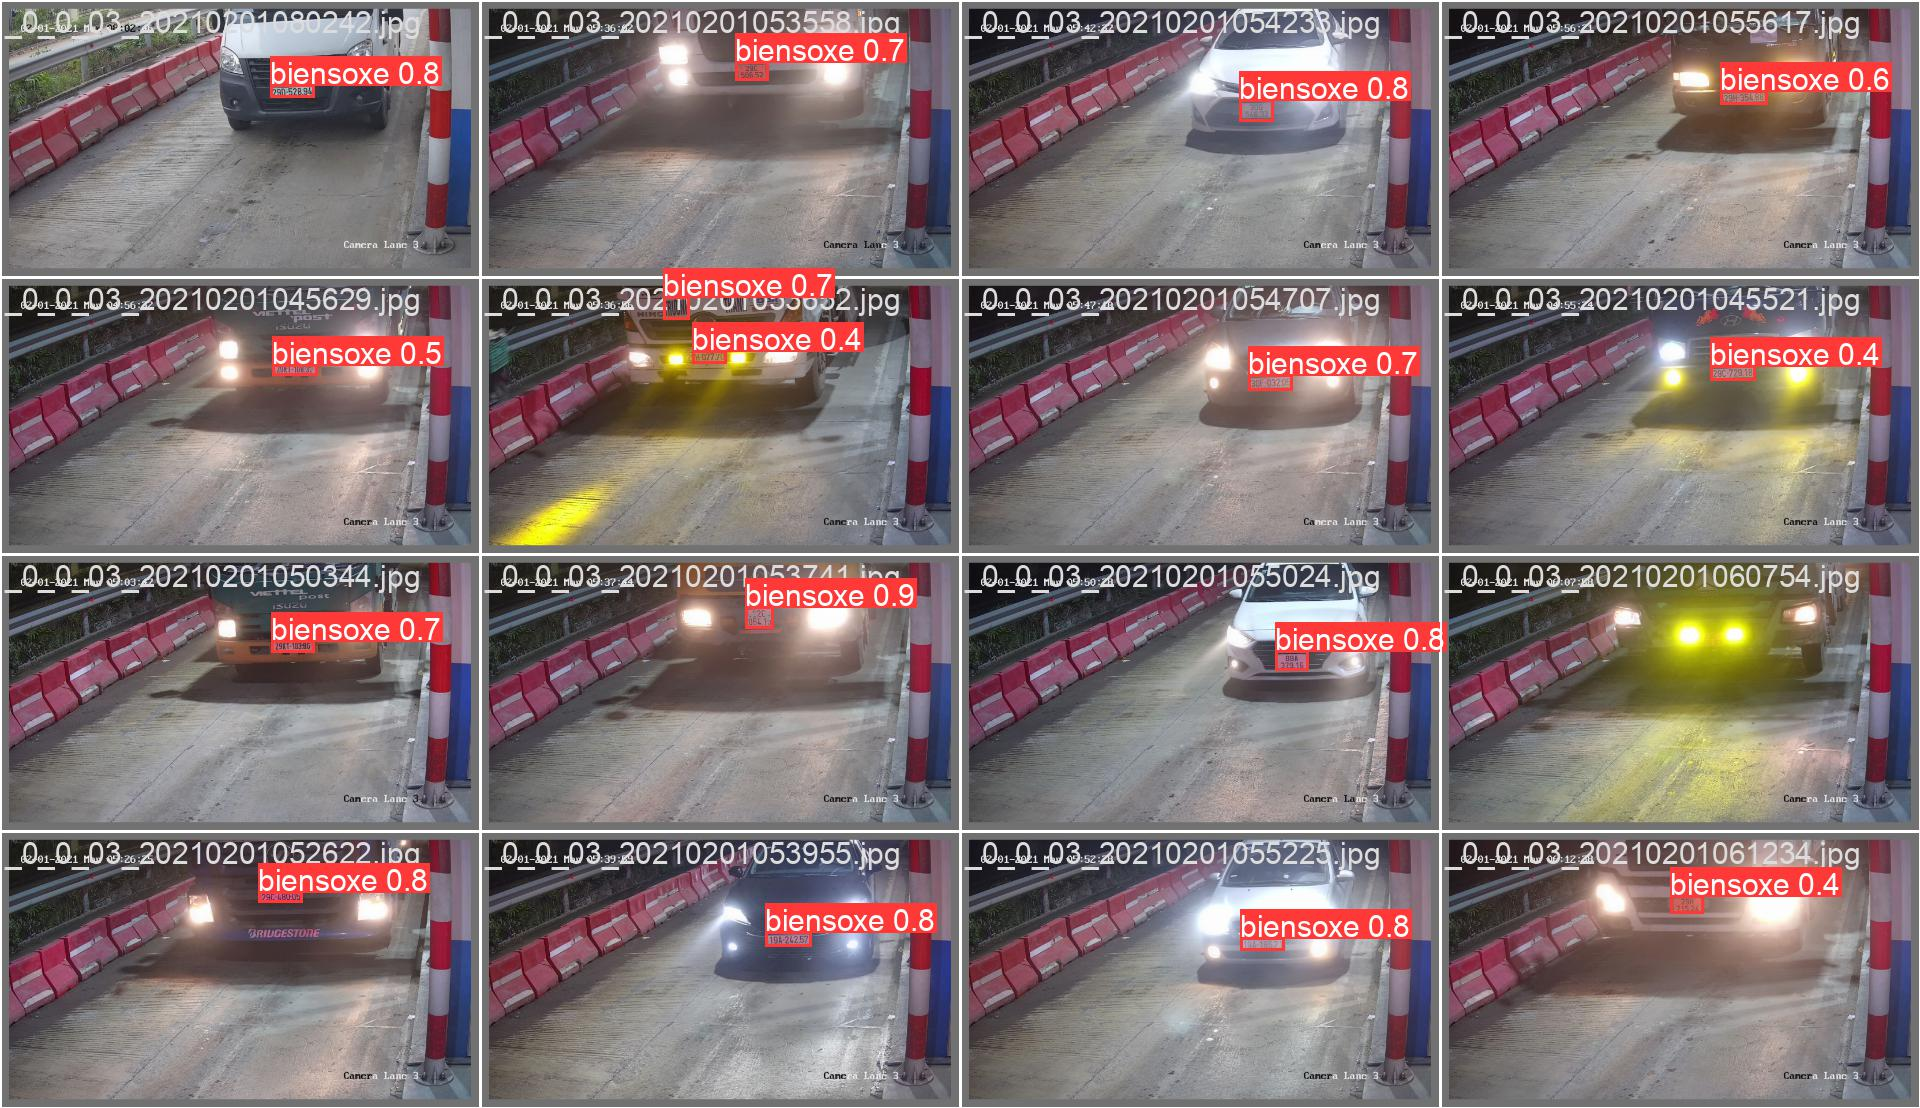

In [9]:
Image('/content/drive/MyDrive/Thesis/Final/ultralytics/runs/detect/train/val_batch0_pred.jpg', width=800)

## Validate Custom Model

## Inference with Custom Model

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/runs/detect/predict2/license_plate.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**NOTE:** Let's take a look at few results.

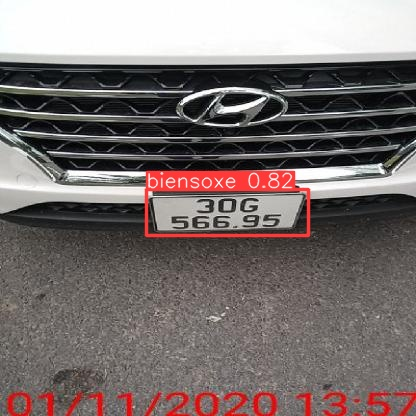

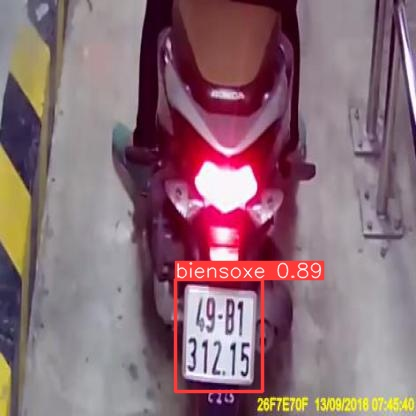

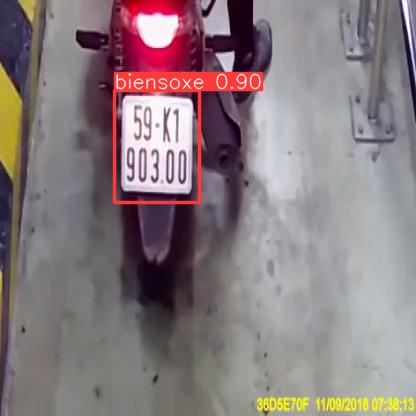

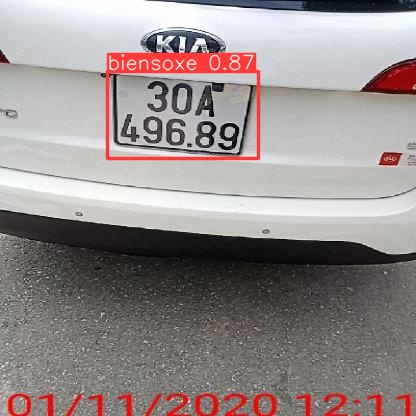

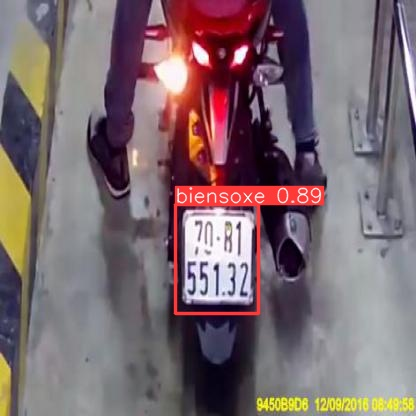

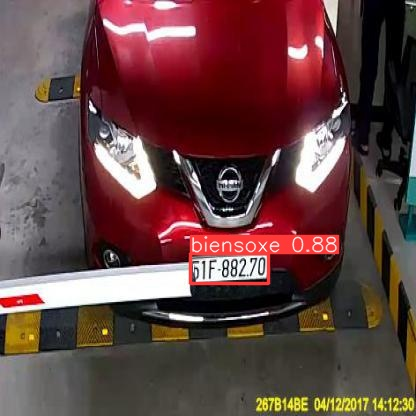

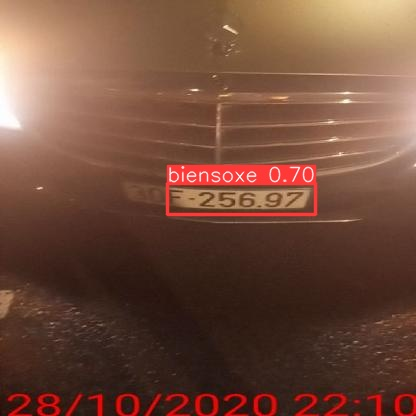

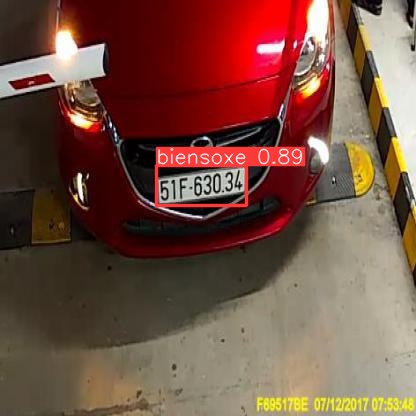

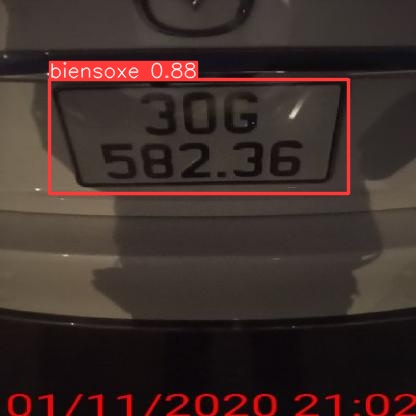

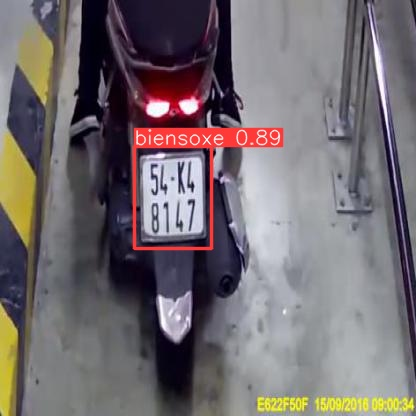

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")